<h1>Telecom Churn Case Study</h1>
<h2>Nishal</h2>
<h2>Poornima</h2>

In [1304]:
#supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [1305]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from tabulate import tabulate
from tabulate import tabulate


In [1306]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

In [1307]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [1308]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [1309]:
#Reading the data set
df=pd.read_csv('telecom_churn_data.csv')

In [1310]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [1311]:
def metadata_matrix(df):
    return pd.DataFrame({
        'Datatype':df.dtypes.astype(str),
        'Non_Null_Count':df.count(axis=0).astype(int),
        'Null_Count':df.isnull().sum().astype(int),
        'Null_Percentage':round(df.isnull().sum()/len(df)*100,2),
        'Unique_Values_Count':df.nunique().astype(int)
    }).sort_values(by='Null_Percentage',ascending=False)
metadata_matrix(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
...,...,...,...,...,...
max_rech_amt_7,int64,99999,0,0.00,183
max_rech_amt_6,int64,99999,0,0.00,202
total_rech_amt_9,int64,99999,0,0.00,2304
total_rech_amt_8,int64,99999,0,0.00,2347


In [1312]:
df.shape

(99999, 226)

In [1313]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [1314]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [1315]:
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

<h3>There are 74-75% null values for average recahrge amount,total reachrge data, max recharge data</h3>

<h2>Data cleaning</h2>

In [1316]:
#checking for duplicate records
df['mobile_number'].value_counts().sum()

99999

<h4>since number of rows is same as distinct mobile numbers there is no duplicate data</h4>

In [1317]:
#setting mobile number as the index
df=df.set_index('mobile_number')

In [1318]:
#converting columns into appropriate data types
#columns with unique values<29 is considered as categorical
#we choose 29 based on metadata
columns=df.columns
change_to_cat=[]
single_val_col=[]
for col in columns:
    unique_count=df[col].nunique()
    if unique_count==1:
        single_val_col.append(col)
    if unique_count<=29 and unique_count!=0 and df[col].dtype in ['int','float']:
        change_to_cat.append(col)
print('columns to change to categorical \n',pd.DataFrame(change_to_cat),'\n')

columns to change to categorical 
                    0
0          circle_id
1     loc_og_t2o_mou
2     std_og_t2o_mou
3     loc_ic_t2o_mou
4   std_og_t2c_mou_6
5   std_og_t2c_mou_7
6   std_og_t2c_mou_8
7   std_og_t2c_mou_9
8   std_ic_t2o_mou_6
9   std_ic_t2o_mou_7
10  std_ic_t2o_mou_8
11  std_ic_t2o_mou_9
12   count_rech_3g_6
13   count_rech_3g_7
14   count_rech_3g_8
15   count_rech_3g_9
16  night_pck_user_6
17  night_pck_user_7
18  night_pck_user_8
19  night_pck_user_9
20      monthly_2g_6
21      monthly_2g_7
22      monthly_2g_8
23      monthly_2g_9
24      monthly_3g_6
25      monthly_3g_7
26      monthly_3g_8
27      monthly_3g_9
28       sachet_3g_6
29       sachet_3g_7
30       sachet_3g_8
31       sachet_3g_9
32         fb_user_6
33         fb_user_7
34         fb_user_8
35         fb_user_9 



In [1319]:
#converting the above columns to categorical
df[change_to_cat]=df[change_to_cat].astype('category')

In [1320]:
df[change_to_cat].dtypes

circle_id           category
loc_og_t2o_mou      category
std_og_t2o_mou      category
loc_ic_t2o_mou      category
std_og_t2c_mou_6    category
std_og_t2c_mou_7    category
std_og_t2c_mou_8    category
std_og_t2c_mou_9    category
std_ic_t2o_mou_6    category
std_ic_t2o_mou_7    category
std_ic_t2o_mou_8    category
std_ic_t2o_mou_9    category
count_rech_3g_6     category
count_rech_3g_7     category
count_rech_3g_8     category
count_rech_3g_9     category
night_pck_user_6    category
night_pck_user_7    category
night_pck_user_8    category
night_pck_user_9    category
monthly_2g_6        category
monthly_2g_7        category
monthly_2g_8        category
monthly_2g_9        category
monthly_3g_6        category
monthly_3g_7        category
monthly_3g_8        category
monthly_3g_9        category
sachet_3g_6         category
sachet_3g_7         category
sachet_3g_8         category
sachet_3g_9         category
fb_user_6           category
fb_user_7           category
fb_user_8     

In [1321]:
# Converting *sachet* variables to categorical data type 
sachet_columns = df.filter(regex='.*sachet.*', axis=1).columns.values
df[sachet_columns] = df[sachet_columns].astype('category')

In [1322]:
#changing datatype of date variables to dateTime
columns=df.columns
col_date=[]
import re
for col in columns:
    x=re.findall("^date",col)
    if x:
        col_date.append(col)
df[col_date].dtypes        

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [1323]:
df[col_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7001865778,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
7001625959,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
7001204172,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
7000142493,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [1324]:
#lets convert the above columns to dateTime format
for col in col_date:
    df[col]=pd.to_datetime(df[col],format="%m/%d/%Y")
df[col_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
7001865778,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
7001625959,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
7001204172,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
7000142493,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


<h2>Filtering high value customers</h2>

In [1325]:
#deriving average recharge amount of june and july month
df['Average_rech_amt_6n7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [1326]:
#filtering high valued customers 
df=df[(df['Average_rech_amt_6n7']>=df['Average_rech_amt_6n7'].quantile(0.7))]

<h2>Missing values</h2>

In [1327]:
#checking for missing value
missing_values=metadata_matrix(df)[['Datatype','Null_Percentage']].sort_values(by='Null_Percentage',ascending=False)
missing_values

,Datatype,Null_Percentage
av_rech_amt_data_6,float64,62.02
count_rech_2g_6,float64,62.02
arpu_2g_6,float64,62.02
max_rech_data_6,float64,62.02
night_pck_user_6,category,62.02
...,...,...
total_rech_num_8,int64,0.00
total_rech_num_7,int64,0.00
total_rech_num_6,int64,0.00
total_ic_mou_9,float64,0.00


In [1328]:
#columns with high missing values
metadata=metadata_matrix(df)
condition=metadata['Null_Percentage']>50
high_missing_values=metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_6,float64,11397,18614,62.02,794
count_rech_3g_6,category,11397,18614,62.02,25
count_rech_2g_6,float64,11397,18614,62.02,30
arpu_2g_6,float64,11397,18614,62.02,4503
max_rech_data_6,float64,11397,18614,62.02,43
night_pck_user_6,category,11397,18614,62.02,2
date_of_last_rech_data_6,datetime64[ns],11397,18614,62.02,30
total_rech_data_6,float64,11397,18614,62.02,36
arpu_3g_6,float64,11397,18614,62.02,4875
fb_user_6,category,11397,18614,62.02,2


In [1329]:
#Dropping columns with high missing value
high_missing_value_columns=high_missing_values.index
df.drop(columns=high_missing_value_columns,inplace=True)


<h4>data contains information of 4 months-6,7,8,9</h4>
<h4>missing data treatment we can do month wise</h4>

In [1330]:
# for month 6

In [1331]:
six_month_col=[]
for col in df.columns:
    x=re.search("6$",col)
    if x:
        six_month_col.append(col);
data=metadata_matrix(df)
condition=data.index.isin(six_month_col)
six_month_metadata=data[condition]
six_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_mou_6,float64,29695,316,1.05,8391
offnet_mou_6,float64,29695,316,1.05,22454
std_ic_t2f_mou_6,float64,29695,316,1.05,2033
isd_ic_mou_6,float64,29695,316,1.05,3429
ic_others_6,float64,29695,316,1.05,1227
onnet_mou_6,float64,29695,316,1.05,18813
std_ic_t2m_mou_6,float64,29695,316,1.05,6680
loc_ic_t2t_mou_6,float64,29695,316,1.05,9872
loc_ic_t2m_mou_6,float64,29695,316,1.05,16015
loc_ic_t2f_mou_6,float64,29695,316,1.05,4817


In [1332]:
#columns with meaningful missing in 6 month
sixth_mon_missing_cond=six_month_metadata['Null_Percentage']==1.05
sixth_mon_missing_cond_cols=six_month_metadata[sixth_mon_missing_cond].index.values
sixth_mon_missing_cond_cols

array(['std_ic_mou_6', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'og_others_6', 'spl_og_mou_6',
       'roam_ic_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2c_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'isd_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6'], dtype=object)

In [1333]:
condition=df[sixth_mon_missing_cond_cols].isnull()
missing_rows=pd.Series([True]*df.shape[0],index=df.index)
for col in sixth_mon_missing_cond_cols:
    missing_rows=missing_rows & df[col].isnull()
print('Total outgoing mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_ic_mou_6'].unique()[0])
    

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


<h1>Impute with 0</h1>

In [1334]:
#imputation
df[sixth_mon_missing_cond_cols]=df[sixth_mon_missing_cond_cols].fillna(0)

metadata=metadata_matrix(df)

metadata.iloc[metadata.index.isin(six_month_col)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,category,30011,0,0.00,5
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,category,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158
total_rech_amt_6,int64,30011,0,0.00,2241


<h4>There is missing value in last recharge column</h4>

In [1335]:
condition=df['date_of_last_rech_6'].isnull()
df[condition].filter(regex='.*rech.*6$',axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
mobile_number,,,,
7001588448,0,0,0,NaT
7001223277,0,0,0,NaT
7000721536,0,0,0,NaT
7001490351,0,0,0,NaT
7000665415,0,0,0,NaT


In [1336]:
df[condition].filter(regex='.*rech.*6$',axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

<h4>date_of_last_rech_6 is missing because there was no recharge made in 6 month,hence these are meaningful missing values,it has one unique value</h4>

In [1337]:
metadata=metadata_matrix(df)
metadata[metadata.index.isin(six_month_col)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,category,30011,0,0.00,5
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,category,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158
total_rech_amt_6,int64,30011,0,0.00,2241


In [1338]:
#Month 7
seven_month_col=df.filter(regex='7$',axis=1).columns
seven_month_col

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [1339]:
seven_month_metadata=metadata[metadata.index.isin(seven_month_col)]
seven_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,category,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


In [1340]:
#columns with meaningful missing in 7 column
seven_mon_missing_cond=seven_month_metadata['Null_Percentage']==1.01
seven_mon_missing_cond_cols=seven_month_metadata[seven_mon_missing_cond].index.values
seven_mon_missing_cond_cols

array(['loc_ic_t2t_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_t2m_mou_7',
       'isd_og_mou_7', 'spl_og_mou_7', 'std_og_t2f_mou_7', 'onnet_mou_7',
       'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7'],
      dtype=object)

In [1341]:
condition=df[seven_mon_missing_cond_cols].isnull()
missing_rows=pd.Series([True]*df.shape[0],index=df.index)
for col in seven_mon_missing_cond_cols:
    missing_rows=missing_rows & df[col].isnull()
print('Total outgoing mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_ic_mou_7'].unique()[0])
    

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [1342]:
#imputing with 0
#imputation
df[seven_mon_missing_cond_cols]=df[seven_mon_missing_cond_cols].fillna(0)

metadata=metadata_matrix(df)

metadata.iloc[metadata.index.isin(seven_month_col)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
last_date_of_month_7,object,29980,31,0.10,1
total_rech_num_7,int64,30011,0,0.00,101
ic_others_7,float64,30011,0,0.00,1371
isd_ic_mou_7,float64,30011,0,0.00,3639
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_amt_7,int64,30011,0,0.00,2265
sachet_2g_7,category,30011,0,0.00,34
monthly_3g_7,category,30011,0,0.00,15
sachet_3g_7,category,30011,0,0.00,27


In [1343]:
#looking at last recharge missing values
condition=df['date_of_last_rech_7'].isnull()
df[condition].filter(regex='.*rech.*7$',axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
mobile_number,,,,,
7000369789,0,0,0,NaT,393.0
7001967148,0,0,0,NaT,500.5
7000066601,0,0,0,NaT,490.0
7001189556,0,0,0,NaT,523.5
7002024450,0,0,0,NaT,493.0


In [1344]:
df[condition].filter(regex='.*rech.*7$',axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    90
dtype: int64

<h4>This is meaningful missing value since no recharge were done in this month</h4>

In [1345]:
#Month 8
eight_month_col=df.filter(regex="8$",axis=1).columns
metadata=metadata_matrix(df)
condition=metadata.index.isin(eight_month_col)
eight_month_metadata=metadata[condition]
eight_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,category,29073,938,3.13,1
std_og_mou_8,float64,29073,938,3.13,16864
isd_og_mou_8,float64,29073,938,3.13,940
loc_ic_mou_8,float64,29073,938,3.13,18573
std_og_t2m_mou_8,float64,29073,938,3.13,13326
loc_ic_t2m_mou_8,float64,29073,938,3.13,15598
loc_og_mou_8,float64,29073,938,3.13,18885
std_og_t2t_mou_8,float64,29073,938,3.13,11781
std_og_t2f_mou_8,float64,29073,938,3.13,1627
loc_ic_t2f_mou_8,float64,29073,938,3.13,4705


In [1346]:
#columns with meaningful missing in 8th column
eight_mon_missing_cond=eight_month_metadata['Null_Percentage']==3.13
eight_mon_missing_cond_cols=eight_month_metadata[eight_mon_missing_cond].index.values
eight_mon_missing_cond_cols

array(['std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2c_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8',
       'spl_og_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'std_ic_t2o_mou_8', 'onnet_mou_8', 'loc_og_t2f_mou_8',
       'offnet_mou_8', 'std_ic_t2f_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'roam_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2t_mou_8'], dtype=object)

In [1347]:
condition=df[eight_mon_missing_cond_cols].isnull()
missing_rows=pd.Series([True]*df.shape[0],index=df.index)
for col in eight_mon_missing_cond_cols:
    missing_rows=missing_rows & df[col].isnull()
print('Total outgoing mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_ic_mou_8'].unique()[0])
    

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [1348]:
#imputing with 0
#imputation
df[eight_mon_missing_cond_cols]=df[eight_mon_missing_cond_cols].fillna(0)

metadata=metadata_matrix(df)

metadata.iloc[metadata.index.isin(eight_month_col)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
last_date_of_month_8,object,29854,157,0.52,1
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96
std_ic_t2f_mou_8,float64,30011,0,0.00,1941
ic_others_8,float64,30011,0,0.00,1259
std_ic_t2o_mou_8,category,30011,0,0.00,1
std_ic_mou_8,float64,30011,0,0.00,8033
total_ic_mou_8,float64,30011,0,0.00,20096
isd_ic_mou_8,float64,30011,0,0.00,3493


In [1349]:
#looking at last recharge missing values
condition=df['date_of_last_rech_8'].isnull()
df[condition].filter(regex='.*rech.*8$',axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
mobile_number,,,,
7000340381,0,0,0,NaT
7000608224,0,0,0,NaT
7000369789,0,0,0,NaT
7000248548,0,0,0,NaT
7001967063,0,0,0,NaT


In [1350]:
df[condition].filter(regex='.*rech.*8$',axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

In [1351]:
#Month 9
nine_month_col=df.filter(regex="9$",axis=1).columns
metadata=metadata_matrix(df)
condition=metadata.index.isin(nine_month_col)
nine_month_metadata=metadata[condition]
nine_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,category,28307,1704,5.68,1
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
og_others_9,float64,28307,1704,5.68,132
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
isd_ic_mou_9,float64,28307,1704,5.68,3329
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
loc_og_mou_9,float64,28307,1704,5.68,18207


In [1352]:
#columns with meaningful missing in 9th column
nine_mon_missing_cond=nine_month_metadata['Null_Percentage']==5.68
nine_mon_missing_cond_cols=nine_month_metadata[nine_mon_missing_cond].index.values
nine_mon_missing_cond_cols

array(['std_og_t2c_mou_9', 'spl_ic_mou_9', 'loc_og_t2m_mou_9',
       'og_others_9', 'loc_og_t2c_mou_9', 'isd_ic_mou_9',
       'loc_og_t2t_mou_9', 'spl_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_og_mou_9', 'roam_og_mou_9', 'std_ic_mou_9',
       'loc_ic_t2m_mou_9', 'roam_ic_mou_9', 'std_og_t2t_mou_9',
       'offnet_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9',
       'isd_og_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'ic_others_9',
       'std_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_og_t2f_mou_9',
       'std_og_t2m_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9',
       'onnet_mou_9'], dtype=object)

In [1353]:
condition=df[nine_mon_missing_cond_cols].isnull()
missing_rows=pd.Series([True]*df.shape[0],index=df.index)
for col in nine_mon_missing_cond_cols:
    missing_rows=missing_rows & df[col].isnull()
print('Total outgoing mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_og_mou_9'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_ic_mou_9'].unique()[0])
    

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [1354]:
#imputing with 0
#imputation
df[nine_mon_missing_cond_cols]=df[nine_mon_missing_cond_cols].fillna(0)

metadata=metadata_matrix(df)

metadata.iloc[metadata.index.isin(nine_month_col)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
last_date_of_month_9,object,29651,360,1.20,1
spl_ic_mou_9,float64,30011,0,0.00,287
total_ic_mou_9,float64,30011,0,0.00,19437
std_ic_mou_9,float64,30011,0,0.00,7745
isd_ic_mou_9,float64,30011,0,0.00,3329
ic_others_9,float64,30011,0,0.00,1284
loc_ic_mou_9,float64,30011,0,0.00,18018
std_ic_t2t_mou_9,float64,30011,0,0.00,4280
std_ic_t2m_mou_9,float64,30011,0,0.00,6168


In [1355]:
#looking at last recharge missing values
condition=df['date_of_last_rech_9'].isnull()
df[condition].filter(regex='.*rech.*9$',axis=1).head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9
mobile_number,,,,
7000340381,0,0,0,NaT
7000854899,0,0,0,NaT
7000369789,0,0,0,NaT
7001967063,0,0,0,NaT
7000066601,0,0,0,NaT


In [1356]:
df[condition].filter(regex='.*rech.*9$',axis=1).nunique()

total_rech_num_9       1
total_rech_amt_9       1
max_rech_amt_9         1
date_of_last_rech_9    0
dtype: int64

In [1357]:
#imputing last date of month
df['last_date_of_month_7']=df['last_date_of_month_7'].fillna(df['last_date_of_month_7'].mode()[0])
df['last_date_of_month_8']=df['last_date_of_month_8'].fillna(df['last_date_of_month_8'].mode()[0])
df['last_date_of_month_9']=df['last_date_of_month_9'].fillna(df['last_date_of_month_9'].mode()[0])

In [1358]:
df['last_date_of_month_7'].unique()

array(['7/31/2014'], dtype=object)

In [1359]:
metadata=metadata_matrix(df)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
loc_og_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
std_og_t2o_mou,category,29897,114,0.38,1
...,...,...,...,...,...
std_og_mou_7,float64,30011,0,0.00,18445
std_og_mou_8,float64,30011,0,0.00,16864
std_og_mou_9,float64,30011,0,0.00,15900
isd_og_mou_6,float64,30011,0,0.00,1113


<h2>Dropping columns with one unique value</h2>

In [1360]:
metadata=metadata_matrix(df)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [1361]:
df.drop(columns=singular_value_cols,inplace=True)

In [1362]:
#dropping date columns
date_cols=df.filter(regex='^date.*').columns
df.drop(columns=date_cols,inplace=True)
metadata_matrix(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,30011,0,0.0,29261
total_ic_mou_6,float64,30011,0,0.0,20602
total_ic_mou_8,float64,30011,0,0.0,20096
total_ic_mou_9,float64,30011,0,0.0,19437
spl_ic_mou_6,float64,30011,0,0.0,78
...,...,...,...,...,...
isd_og_mou_6,float64,30011,0,0.0,1113
isd_og_mou_7,float64,30011,0,0.0,1125
isd_og_mou_8,float64,30011,0,0.0,940
isd_og_mou_9,float64,30011,0,0.0,908


<h2>Churn(Target Variable)</h2>

In [1363]:
df['Churn']=0
churned_cust=df.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
df.loc[churned_cust,'Churn']=1
df['Churn']=df['Churn'].astype('category')

In [1364]:
df['Churn'].value_counts(normalize=True).to_frame()

,proportion
Churn,
0,0.913598
1,0.086402


<h3>Dropping churn phase columns</h3>

In [1365]:
churn_phase_col=df.filter(regex='9$').columns
df.drop(columns=churn_phase_col,inplace=True)
df.columns.to_frame(index=False)

,0
0,arpu_6
1,arpu_7
2,arpu_8
3,onnet_mou_6
4,onnet_mou_7
...,...
122,jul_vbc_3g
123,jun_vbc_3g
124,sep_vbc_3g
125,Average_rech_amt_6n7


In [1366]:
print('retained no of rows: ',df.shape[0])
print('retained no of columns: ',df.shape[1])


retained no of rows:  30011
retained no of columns:  127


<h2>EDA</h2>

In [1367]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,...,69.209105,258.392681,278.093737,269.864111,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356
std,442.722413,462.897814,492.259586,460.775592,481.780488,466.560947,470.588583,486.525332,477.489377,79.152657,...,268.494284,866.195376,855.682340,859.299266,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,368.500000
25%,364.161000,365.004500,289.609500,41.110000,40.950000,27.010000,137.335000,135.680000,95.695000,0.000000,...,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000
50%,495.682000,493.561000,452.091000,125.830000,125.460000,99.440000,282.190000,281.940000,240.940000,0.000000,...,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,568.500000
75%,703.922000,700.788000,671.150000,353.310000,359.925000,297.735000,523.125000,532.695000,482.610000,0.000000,...,9.620000,0.000000,2.080000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000,795.500000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,11117.610000,45735.400000,28144.120000,30036.060000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000


<h5>Users with negative average revenues are likely to churn</h5>

In [1368]:
cat_cols=df.dtypes[df.dtypes=='category'].index.values
print('Mode :')
df[cat_cols].mode().T

Mode :


,0
monthly_2g_6,0
monthly_2g_7,0
monthly_2g_8,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
monthly_3g_6,0
monthly_3g_7,0
monthly_3g_8,0
sachet_3g_6,0


<h5>Most customers prefer to choose plan of category '0'</h5>

<h2>Univariate Analysis
</h2>

In [1369]:
churned_cust=df[df['Churn']==1]
non_churned_cust=df[df['Churn']==0]

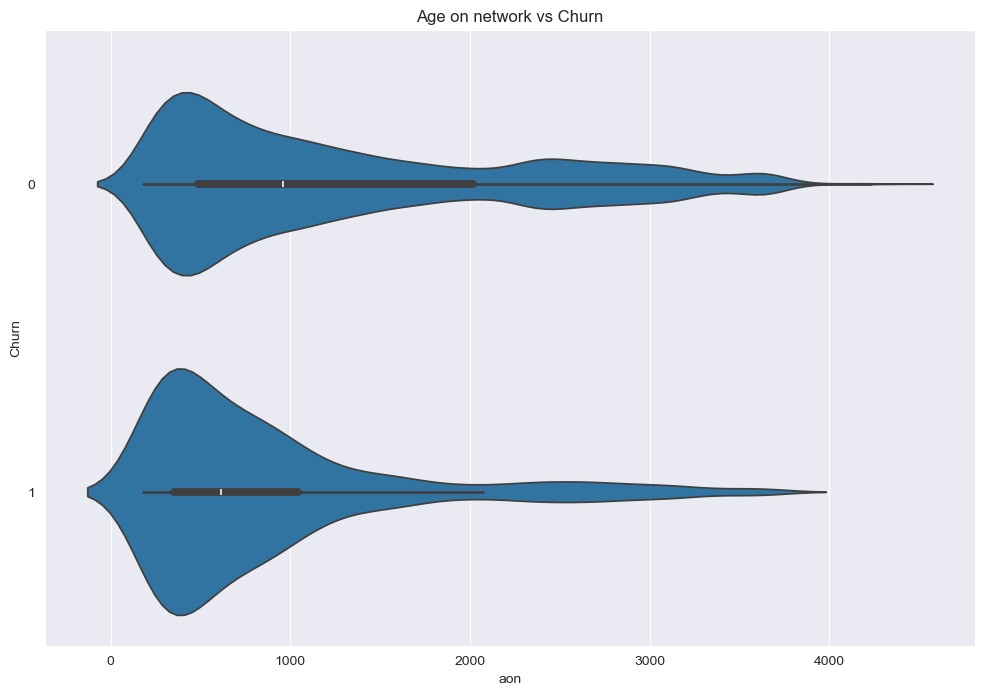

In [1370]:
plt.figure(figsize=(12,8))
sns.violinplot(x='aon',y='Churn',data=df)
plt.title('Age on network vs Churn')
plt.show()

<h5>Customers with lesser aon are more likely to churn when compared to customers with higher aon</h5>

In [1371]:
import sidetable
def cat_univariate_analysis(col,figsize=(16,4)):
    fig=plt.figure(figsize=figsize)

    ax1=fig.add_subplot(1,3,1)
    sns.countplot(x=col[0],hue='Churn',data=df,ax=ax1)
    title=col[0]+' vs No of Churned Customers'
    ax1.set(title=title)
    ax1.legend(loc='upper right')

    ax2=fig.add_subplot(1,3,2)
    sns.countplot(x=col[1],hue='Churn',data=df,ax=ax2)
    title=col[1]+' vs No of Churned Customers'
    ax2.set(title=title)
    ax2.legend(loc='upper right')

    ax3=fig.add_subplot(1,3,3)
    sns.countplot(x=col[2],hue='Churn',data=df,ax=ax3)
    title=col[2]+' vd No of Churned Customers'
    ax3.set(title=title)
    ax3.legend(loc='upper right')
    
    plt.tight_layout() 
    plt.show()

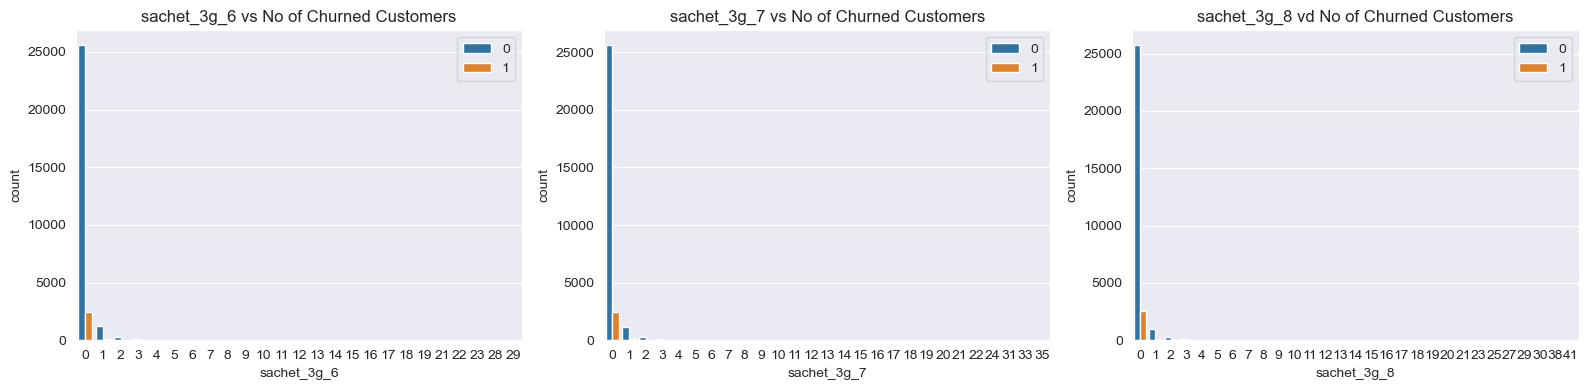

In [1372]:
columns=['sachet_3g_6','sachet_3g_7','sachet_3g_8']
cat_univariate_analysis(columns)

<h2>Bivariate Analysis</h2>

In [1373]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

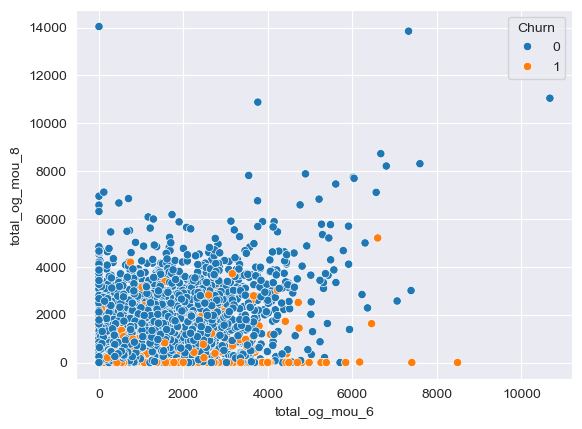

In [1374]:
sns.scatterplot(x=df['total_og_mou_6'],y=df['total_og_mou_8'],hue=df['Churn'])

<Axes: xlabel='total_og_mou_7', ylabel='total_og_mou_8'>

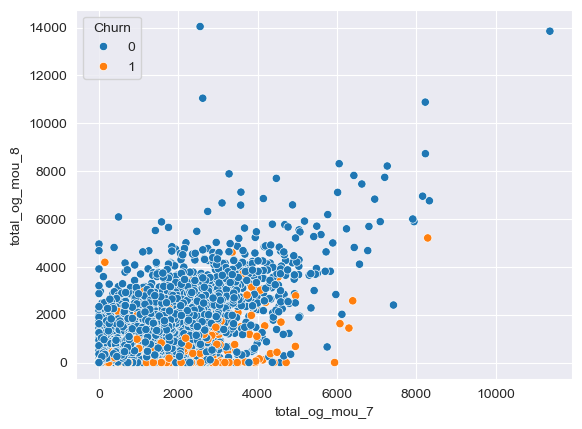

In [1375]:
sns.scatterplot(x=df['total_og_mou_7'],y=df['total_og_mou_8'],hue=df['Churn'])

<h5>Customers with lower total_og_mou are more likely 
    to churn</h5>

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

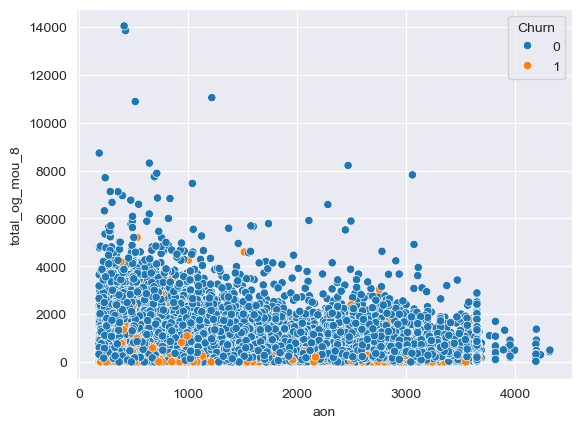

In [1376]:
sns.scatterplot(x=df['aon'],y=df['total_og_mou_8'],hue=df['Churn'])

<h5>Customers with less value of aon and total_og_mou are more likely to churn compared to the ones with higher value</h5>

<Axes: xlabel='aon', ylabel='total_ic_mou_8'>

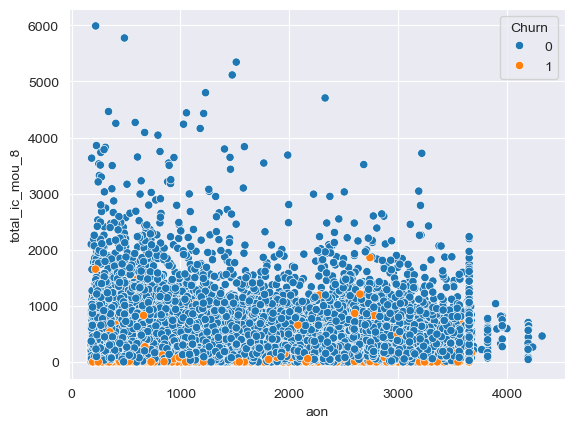

In [1377]:
sns.scatterplot(x=df['aon'],y=df['total_ic_mou_8'],hue=df['Churn'])

<h5>customers with total_ic_mou_8>2000 are less likely to churn</h5>

<Axes: xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

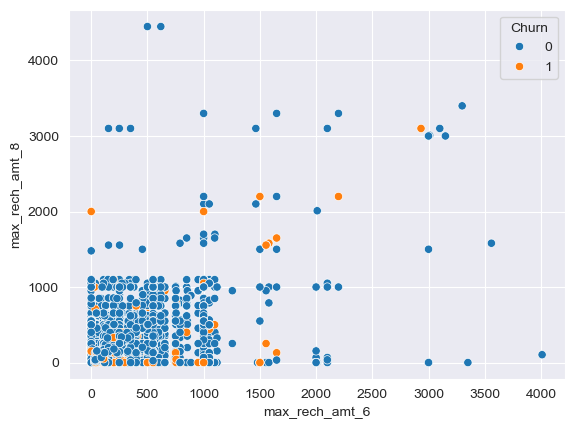

In [1378]:
sns.scatterplot(x=df['max_rech_amt_6'],y=df['max_rech_amt_8'],hue=df['Churn'])

<h2>Correlation Analysis</h2>

In [1379]:
def correlation(df):
    cols=list(set(df.columns.values)-{'Churn'})
    cor0=df[cols].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool_))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['Var1','Var2','Corr']
    cor0.dropna(subset=['Corr'],inplace=True)
    cor0.Corr=round(cor0['Corr'],2)
    cor0.Corr=cor0.Corr.abs()
    cor0.sort_values(by=['Corr'],ascending=False)
    cor0=cor0[~(cor0['Var1']==cor0['Var2'])]

    #removing duplicate corelatives
    cor0['pair']=cor0[['Var1','Var2']].apply(lambda x: '{}-{}'.format(*sorted((x[0],x[1]))),axis=1)


    cor0=cor0.drop_duplicates(subset=['pair'],keep='first')
    cor0=cor0[['Var1','Var2','Corr']]
    return pd.DataFrame(cor0.sort_values(by=['Corr'],ascending=False))

In [1380]:
#correlation for Churn:0 - non churn customers
#absolute values are reported
#pd.set_option('precision',2)
cor_0=correlation(non_churned_cust)

#filtering for corelation>=40

condition=cor_0['Corr']>0.4
cor_0=cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu')


,Var1,Var2,Corr
1226,isd_og_mou_7,isd_og_mou_8,0.960000
848,isd_og_mou_6,isd_og_mou_8,0.950000
3578,total_rech_amt_8,arpu_8,0.950000
765,isd_og_mou_6,isd_og_mou_7,0.950000
3225,total_rech_amt_7,arpu_7,0.940000
3700,total_rech_amt_6,arpu_6,0.940000
9538,arpu_7,Average_rech_amt_6n7,0.910000
3238,total_rech_amt_7,Average_rech_amt_6n7,0.910000
3742,total_rech_amt_6,Average_rech_amt_6n7,0.900000
1694,loc_ic_mou_6,total_ic_mou_6,0.900000


In [1381]:
#correlation for Churn:1 -  churn customers
#absolute values are reported
#pd.set_option('precision',2)
cor_1=correlation(churned_cust)

#filtering for corelation>=40

condition=cor_1['Corr']>0.4
cor_1=cor_1[condition]
cor_1.style.background_gradient(cmap='GnBu')


,Var1,Var2,Corr
5389,og_others_7,og_others_8,1.000000
3578,total_rech_amt_8,arpu_8,0.960000
4998,std_og_t2t_mou_7,onnet_mou_7,0.950000
303,total_og_mou_8,std_og_mou_8,0.950000
3700,total_rech_amt_6,arpu_6,0.950000
3225,total_rech_amt_7,arpu_7,0.950000
5971,std_og_mou_7,total_og_mou_7,0.940000
11311,loc_og_t2f_mou_6,og_others_8,0.930000
6771,onnet_mou_8,std_og_t2t_mou_8,0.930000
11323,loc_og_t2f_mou_6,loc_og_t2f_mou_7,0.930000


<h2>Derived Variables</h2>

In [1382]:
#derived variables to measure change in usage

#usage
df['delta_vol_2g']=df['vol_2g_mb_8']-df['vol_2g_mb_6'].add(df['vol_2g_mb_7']).div(2)
df['delta_vol_3g']=df['vol_3g_mb_8']-df['vol_3g_mb_6'].add(df['vol_3g_mb_7']).div(2)
df['delta_total_og_mou']=df['total_og_mou_8']-df['total_og_mou_6'].add(df['total_og_mou_7']).div(2)
df['delta_total_ic_mou']=df['total_ic_mou_8']-df['total_ic_mou_6'].add(df['total_ic_mou_7']).div(2)
#Revenue
df['delta_arpu']=df['arpu_8']-df['arpu_6'].add(df['arpu_7']).div(2)
df['delta_total_rech_amt']=df['total_rech_amt_8']-df['total_rech_amt_6'].add(df['total_rech_amt_7']).div(2)

In [1383]:
#removing features used for derivation
df.drop(columns=[
    'vol_2g_mb_8','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_8','vol_3g_mb_6','vol_3g_mb_7','total_og_mou_8','total_og_mou_6',
    'total_og_mou_7','total_ic_mou_8','total_ic_mou_6','total_ic_mou_7','arpu_8','arpu_6','arpu_7','total_rech_amt_8','total_rech_amt_6',
    'total_rech_amt_7'
],inplace=True)

<h2>Outlier Treatment</h2>

In [1384]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate quantiles and apply styling
numeric_df.quantile(np.arange(0.9, 1.01, 0.01)).style.bar()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_arpu,delta_total_rech_amt
0.900000,794.980000,824.380000,723.610000,915.580000,935.690000,853.790000,32.730000,18.360000,18.680000,64.480000,41.200000,37.110000,207.930000,207.840000,196.910000,435.160000,437.490000,416.660000,18.380000,18.660000,16.960000,4.040000,4.840000,4.450000,661.740000,657.380000,633.340000,630.530000,663.790000,567.340000,604.410000,645.880000,531.260000,2.200000,2.180000,1.730000,1140.930000,1177.180000,1057.290000,0.000000,0.000000,0.000000,15.930000,19.510000,18.040000,2.260000,0.000000,0.000000,154.880000,156.610000,148.140000,368.540000,364.540000,360.540000,39.230000,41.040000,37.190000,559.280000,558.990000,549.790000,34.730000,36.010000,32.140000,73.380000,75.280000,68.580000,4.360000,4.580000,3.940000,115.910000,118.660000,108.380000,0.280000,0.000000,0.000000,15.010000,18.300000,15.330000,1.160000,1.590000,1.230000,23.000000,23.000000,21.000000,297.000000,300.000000,252.000000,250.000000,250.000000,225.000000,2846.000000,438.970000,454.830000,394.500000,0.000000,1118.000000,29.835000,170.075000,345.070000,147.300000,257.309500,319.000000
0.910000,848.967000,878.352000,783.488000,966.740000,984.020000,899.286000,39.692000,23.281000,23.392000,78.431000,50.012000,46.435000,225.963000,224.873000,213.831000,461.095000,461.812000,441.836000,20.281000,20.680000,18.840000,4.680000,5.512000,5.112000,703.112000,692.668000,669.633000,686.255000,722.843000,622.128000,658.472000,695.767000,583.424000,2.910000,2.800000,2.280000,1195.610000,1244.396000,1125.276000,0.000000,0.000000,0.000000,17.540000,21.283000,19.692000,2.540000,0.000000,0.000000,165.792000,168.033000,159.838000,390.636000,387.112000,382.199000,43.590000,45.392000,41.212000,593.133000,589.645000,580.535000,38.212000,39.912000,35.930000,80.412000,81.931000,75.542000,5.210000,5.491000,4.710000,125.981000,129.288000,118.240000,0.300000,0.000000,0.000000,18.341000,21.841000,18.831000,1.440000,1.940000,1.510000,24.000000,24.000000,22.000000,325.000000,330.000000,289.000000,250.000000,250.000000,250.000000,2910.100000,497.192000,515.480000,444.993000,0.000000,1156.000000,39.883000,227.151000,377.460500,161.801000,278.900400,345.500000
0.920000,909.054000,941.990000,848.964000,1031.390000,1038.090000,953.354000,48.710000,29.680000,29.644000,93.598000,60.966000,57.594000,247.944000,244.780000,232.330000,490.630000,488.036000,468.830000,22.560000,23.144000,20.930000,5.450000,6.260000,5.864000,742.956000,735.694000,711.570000,750.312000,786.386000,680.104000,713.490000,760.976000

In [1385]:
numeric_df.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_arpu,delta_total_rech_amt
0.900000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.910000,6.790988,6.546981,8.274899,5.587715,5.165172,5.328711,21.271005,26.802832,25.224839,21.636166,21.388350,25.127998,8.672630,8.195246,8.593266,5.959877,5.559441,6.042337,10.342764,10.825295,11.084906,15.841584,13.884298,14.876404,6.252002,5.367976,5.730413,8.837803,8.896338,9.656996,8.944591,7.723881,9.818921,32.272727,28.440367,31.791908,4.792581,5.709917,6.430213,nan,nan,nan,10.106717,9.087647,9.157428,12.389381,nan,nan,7.045455,7.293915,7.896584,5.995550,6.191913,6.007378,11.113943,10.604288,10.814735,6.052961,5.483998,5.592135,10.025914,10.835879,11.792159,9.582993,8.835016,10.151648,19.495413,19.890830,19.543147,8.688638,8.956683,9.097619,7.142857,nan,nan,22.191872,19.349727,22.837573,24.137931,22.012579,22.764228,4.347826,4.347826,4.761905,9.427609,10.000000,14.682540,0.000000,0.000000,11.111111,2.252284,13.263321,13.334653,12.799240,nan,3.398927,33.678565,33.559312,9.386646,9.844535,8.391023,8.307210
0.920000,7.077660,7.245159,8.356988,6.687424,5.494807,6.012325,22.719944,27.485933,26.727086,19.338017,21.902743,24.031442,9.727699,8.852552,8.651225,6.405405,5.678501,6.109507,11.237118,11.914894,11.093418,16.452991,13.570392,14.710485,5.666807,6.211634,6.262684,9.334285,8.790706,9.318983,8.355405,9.372247,9.794249,28.522337,32.500000,32.017544,6.124071,5.680185,6.755143,inf,inf,nan,9.806157,9.918714,10.603291,12.598425,nan,nan,8.679550,8.010926,8.604963,6.464330,6.436897,6.219535,11.603579,11.614381,12.079006,6.154269,5.887441,5.841336,11.828745,11.700742,11.299750,9.767199,10.348952,10.460406,21.497121,20.378802,22.123142,9.794334,9.954520,10.412720,10.000000,nan,inf,23.123058,23.346001,25.197812,23.611111,22.680412,23.178808,4.166667,4.166667,4.545455,7.692308,6.060606,14.186851,0.000000,0.000000,0.000000,2.443215,12.964006,13.550865,14.085390,inf,3.979239,34.548555,27.360654,11.261178,9.607481,8.823437,8.538350
0.930000,8.957224,7.872164,8.480572,6.144814,6.342032,6.712302,24.032026,25.616577,27.857239,18.748264,23.022668,25.801299,11.116220,10.996813,9.602290,6.710760,6.507717,6.729731,11.906028,12.322848,1

In [1386]:
#columns with outliers
pct_change_99_1=numeric_df.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition=pct_change_99_1>100
cols_outliers=pct_change_99_1[outlier_condition].index.values
print('col with outliers',cols_outliers)

col with outliers ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'loc_ic_t2

In [1387]:
#outlier treatment to 99th percentile values
outlier_treatment=pd.DataFrame(columns=['Column','Outlier Threshold','Outliers Replaced'])

for col in cols_outliers:
    outlier_threshold=df[col].quantile(0.99)
    condition=df[col]>outlier_threshold

    new_row=pd.DataFrame({
        'Column':[col],
        'Outlier Threshold':[outlier_threshold],
        'Outliers Replaced':[df.loc[condition,col].shape[0]]
        
    })
    outlier_treatment=pd.concat([outlier_treatment,new_row],ignore_index=True)
    df.loc[condition,col]=outlier_threshold
outlier_treatment 

,Column,Outlier Threshold,Outliers Replaced
0,onnet_mou_6,2166.37000,301
1,onnet_mou_7,2220.36700,301
2,onnet_mou_8,2188.50400,301
3,offnet_mou_6,2326.29000,301
4,offnet_mou_7,2410.10400,301
...,...,...,...
96,delta_vol_3g,1878.12400,301
97,delta_total_og_mou,1465.10300,301
98,delta_total_ic_mou,619.69100,301
99,delta_arpu,864.34085,301


In [1388]:
categorical=df.dtypes=='category'
categorical_var=df.columns[categorical].to_list()
ind_categorical_var=set(categorical_var)-{'Churn'}
ind_categorical_var

{'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

<h2>Grouping categories with less contribution</h2>

In [1389]:
for col in ind_categorical_var:
    cat_count=100*df[col].value_counts(normalize=True)
    print(tabulate(pd.DataFrame(cat_count),headers='Keys',tablefmt='psql'),'\n')
    low_count_cat=cat_count[cat_count<=1].index.to_list()

    df[col].replace(low_count_cat,'Others',inplace=True)

+-----+-------------+
|   K |           e |
|-----+-------------|
|   0 | 89.7604     |
|   1 |  9.19996    |
|   2 |  0.942988   |
|   3 |  0.0733065  |
|   4 |  0.0166606  |
|   5 |  0.00666422 |
+-----+-------------+ 

+-----+-------------+
|   K |           e |
|-----+-------------|
|   0 | 88.4876     |
|   1 | 10.0397     |
|   2 |  1.35284    |
|   3 |  0.0966312  |
|   4 |  0.0166606  |
|   5 |  0.00666422 |
+-----+-------------+ 

+-----+-------------+
|   K |           e |
|-----+-------------|
|   0 | 93.4091     |
|   1 |  4.35507    |
|   2 |  1.04295    |
|   3 |  0.396521   |
|   4 |  0.219919   |
|   5 |  0.123288   |
|   6 |  0.089967   |
|   7 |  0.0866349  |
|   8 |  0.0499817  |
|   9 |  0.0499817  |
|  10 |  0.0366532  |
|  11 |  0.0266569  |
|  15 |  0.0166606  |
|  19 |  0.0133284  |
|  12 |  0.0133284  |
|  14 |  0.00999633 |
|  18 |  0.00999633 |
|  13 |  0.00999633 |
|  23 |  0.00999633 |
|  16 |  0.00666422 |
|  22 |  0.00666422 |
|  29 |  0.00666422 |
|  17 

In [1390]:
ind_categorical_var_list=list(ind_categorical_var)

<h2>Dummy Variables</h2>

In [1391]:
dummy_var=pd.get_dummies(df[ind_categorical_var_list],drop_first=False,prefix=ind_categorical_var,prefix_sep='_')
dummy_var=dummy_var.astype(int)
dummy_var.head(5)

,monthly_2g_8_0,monthly_2g_8_1,monthly_2g_8_Others,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_Others,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,...,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_Others
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7001524846,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7002191713,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7000875565,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7000187447,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1392]:
reference_cols=dummy_var.filter(regex='.*Others$').columns.to_list()
dummy_var.drop(columns=reference_cols,inplace=True)
reference_cols

['monthly_2g_8_Others',
 'monthly_2g_7_Others',
 'sachet_3g_6_Others',
 'monthly_3g_6_Others',
 'sachet_2g_6_Others',
 'monthly_3g_7_Others',
 'sachet_3g_7_Others',
 'sachet_2g_8_Others',
 'monthly_2g_6_Others',
 'sachet_3g_8_Others',
 'monthly_3g_8_Others',
 'sachet_2g_7_Others']

In [1393]:
#concat with original data
df.drop(columns=ind_categorical_var,inplace=True)
df=pd.concat([df,dummy_var], axis=1)
df.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_3g_8_1,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,0,1,0,0,1,0,0,0,0,0
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,...,0,1,0,0,0,1,0,0,0,0
7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,...,0,1,0,0,1,0,0,0,0,0
7000875565,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,...,0,1,0,0,1,0,0,0,0,0
7000187447,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,...,0,1,0,0,1,0,0,0,0,0


In [1394]:
dummy_col=dummy_var.columns.to_list()
df[dummy_col]=df[dummy_col].astype('category')


In [1395]:
df.shape

(30011, 145)

<h2>Train test Split</h2>

In [1396]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [1397]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

<h2>Class Imbalance</h2>

In [1398]:
y.value_counts(normalize=True).to_frame()

,proportion
Churn,
0,0.913598
1,0.086402


class imbalace ratio 0.09457290830841053


([<matplotlib.patches.Wedge at 0x36df3fbd0>,
 [Text(-1.059724749579306, 0.2949295765586713, 'class 0'),
  Text(1.059724763385955, -0.29492952694937474, 'class 1')])

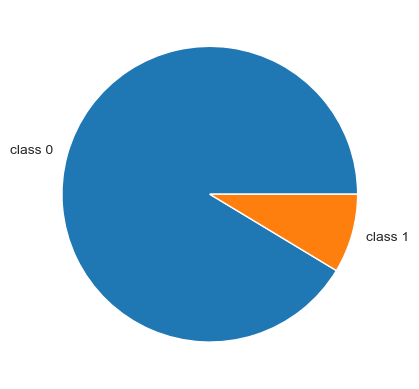

In [1399]:
#ratio of classess
class_0=y[y==0].count()
class_1=y[y==1].count()

imbalance=min(class_0,class_1)/max(class_0,class_1)
print("class imbalace ratio",imbalance)

sizes=[class_0,class_1]
labels=['class 0','class 1']
plt.pie(sizes,labels=labels)

<h2>Using SMOTE</h2>

In [1400]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=42,k_neighbors=5)

#resampling train set
x_train_resampled,y_train_sampled=smt.fit_resample(x_train,y_train)
x_train_resampled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_3g_8_1,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5
0,53.01,52.64,37.48,316.01,195.74,68.36,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
1,91.39,216.14,150.58,504.19,301.98,434.41,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
2,11.96,14.13,0.40,1.51,0.00,0.00,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
3,532.66,537.31,738.21,49.03,71.64,39.43,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,122.68,105.51,149.33,302.23,211.44,264.11,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0


<h2>Standardizing columns</h2>

In [1401]:
#columns with  numerical data
condition1=df.dtypes=='int'
condition2=df.dtypes=='float'

numerical_var=df.columns[condition1 | condition2].to_list()

In [1402]:
#standard scaling
scaler=StandardScaler()

#fit and transform train set
x_train_resampled[numerical_var]=scaler.fit_transform(x_train_resampled[numerical_var])

#transform the data set
x_test[numerical_var]=scaler.transform(x_test[numerical_var])

In [1403]:
#summary statistics of standardized variables
round(x_train_resampled.describe(),2)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_arpu,delta_total_rech_amt
count,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,...,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-0.68,-0.53,-0.94,-0.89,-0.70,-0.31,-0.32,-0.33,-0.33,...,-0.32,-0.32,-0.15,-0.91,-28.14,-27.20,-11.65,-14.65,-14.93,-14.66
25%,-0.63,-0.60,-0.52,-0.66,-0.65,-0.66,-0.31,-0.32,-0.33,-0.33,...,-0.32,-0.32,-0.15,-0.68,0.12,0.11,-0.41,-0.22,-0.51,-0.49
50%,-0.42,-0.41,-0.40,-0.34,-0.33,-0.36,-0.31,-0.32,-0.33,-0.33,...,-0.32,-0.32,-0.15,-0.35,0.15,0.11,0.23,0.13,0.08,0.03
75%,0.20,0.15,0.01,0.27,0.26,0.23,-0.27,-0.25,-0.22,-0.28,...,-0.32,-0.32,-0.15,0.30,0.15,0.11,0.50,0.36,0.58,0.58
max,4.10,4.47,5.68,4.02,4.45,5.25,6.12,6.09,6.19,5.43,...,6.47,6.54,10.04,4.46,4.05,4.25,2.96,3.13,2.84,2.84


<h2>Modelling</h2>

<h3>Logistic Regression</h3>

In [1404]:
lr_model=LogisticRegression(random_state=100,class_weight='balanced')
lr_model=lr_model.fit(x_train,y_train)

y_train_pred=lr_model.predict_proba(x_train)[:,1]
y_test_pred=lr_model.predict_proba(x_test)[:,1]

In [1405]:
y_train_pred=pd.Series(y_train_pred,index=x_train.index)
y_test_pred=pd.Series(y_test_pred,index=x_test.index)

In [1406]:
#function to evaluate the metrics
import math
def metrics(matrix):
    TN=matrix[0][0]
    TP=matrix[1][1]
    FP=matrix[0][1]
    FN=matrix[1][0]
    accuracy=round((TP+TN)/float(TP+TN+FP+FN),3)
    print('accuracy',accuracy)
    sensitivity=round(TP/float(FN+TP),3)
    print('Sensitivity',sensitivity)
    specificity=round(TN/float(TN+FP),3)
    print('Specificity',specificity)
    precision=round(TP/float(TP+FP),3)
    print('precision',precision)
    print('F1 score',round(2*precision*sensitivity/(precision+sensitivity),3))

<h2>Performance metrics</h2>

In [1407]:
#prediction at threshold of 0.5
classification_thres=0.5;

y_train_pred_class=y_train_pred.map(lambda x:1 if x>classification_thres else 0)
y_test_pred_class=y_test_pred.map(lambda x:1 if x>classification_thres else 0)

In [1408]:
train_matrix=confusion_matrix(y_train,y_train_pred_class)
print('Confusion Matrix for train:',train_matrix)
test_matrix=confusion_matrix(y_test,y_test_pred_class)
print("confusion Matrix for test:",test_matrix)

Confusion Matrix for train: [[16021  3166]
 [  317  1503]]
confusion Matrix for test: [[4695 3536]
 [  90  683]]


<h2>Finding optimal probability cutoff</h2>

In [1409]:
#Specificity/Sensitivity Tradeoff
y_train_pred_thre=pd.DataFrame(index=x_train.index)
thresholds=[float(x)/10 for x in range(10)]

def thresholder(x,thresh):
    if(x>thresh):
        return 1
    else:
        return 0
for i in thresholds:
    y_train_pred_thre[i]=y_train_pred.map(lambda x: thresholder(x,i))
y_train_pred_thre.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,1,1,1,1,0,0,0,0,0
7001343085,1,1,1,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,1,1,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [1410]:
metrics_df=pd.DataFrame(columns=['sensitivity','specificity','accuracy'])

#function to calculate metrics for each threshold
def model_metrics(matrix):
    TN=matrix[0][0]
    TP=matrix[1][1]
    FP=matrix[0][1]
    FN=matrix[1][0]
    accuracy=round((TP+TN)/float(TP+TN+FP+FN),3)
    sensitivity=round(TP/float(FN+TP),3)
    specificity=round(TN/float(TN+FP),3)
    return sensitivity,specificity,accuracy

metrics_df=[]

#generating a data frame for metrics of each threshold
for thres,col in zip(thresholds,y_train_pred_thre.columns.to_list()):
    confusion=confusion_matrix(y_train,y_train_pred_thre.loc[:,col])
    sensitivity,specificity,accuracy=model_metrics(confusion)

    metrics_df.append({
    'sensitivity':sensitivity,
    'specificity':specificity,
    'accuracy':accuracy})

metrics_df=pd.DataFrame(metrics_df)
metrics_df.index=thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.087
0.1,0.977,0.360,0.414
0.2,0.945,0.536,0.571
0.3,0.908,0.665,0.686
0.4,0.875,0.766,0.775
0.5,0.826,0.835,0.834
0.6,0.775,0.883,0.874
0.7,0.684,0.919,0.898
0.8,0.509,0.953,0.914
0.9,0.247,0.980,0.917


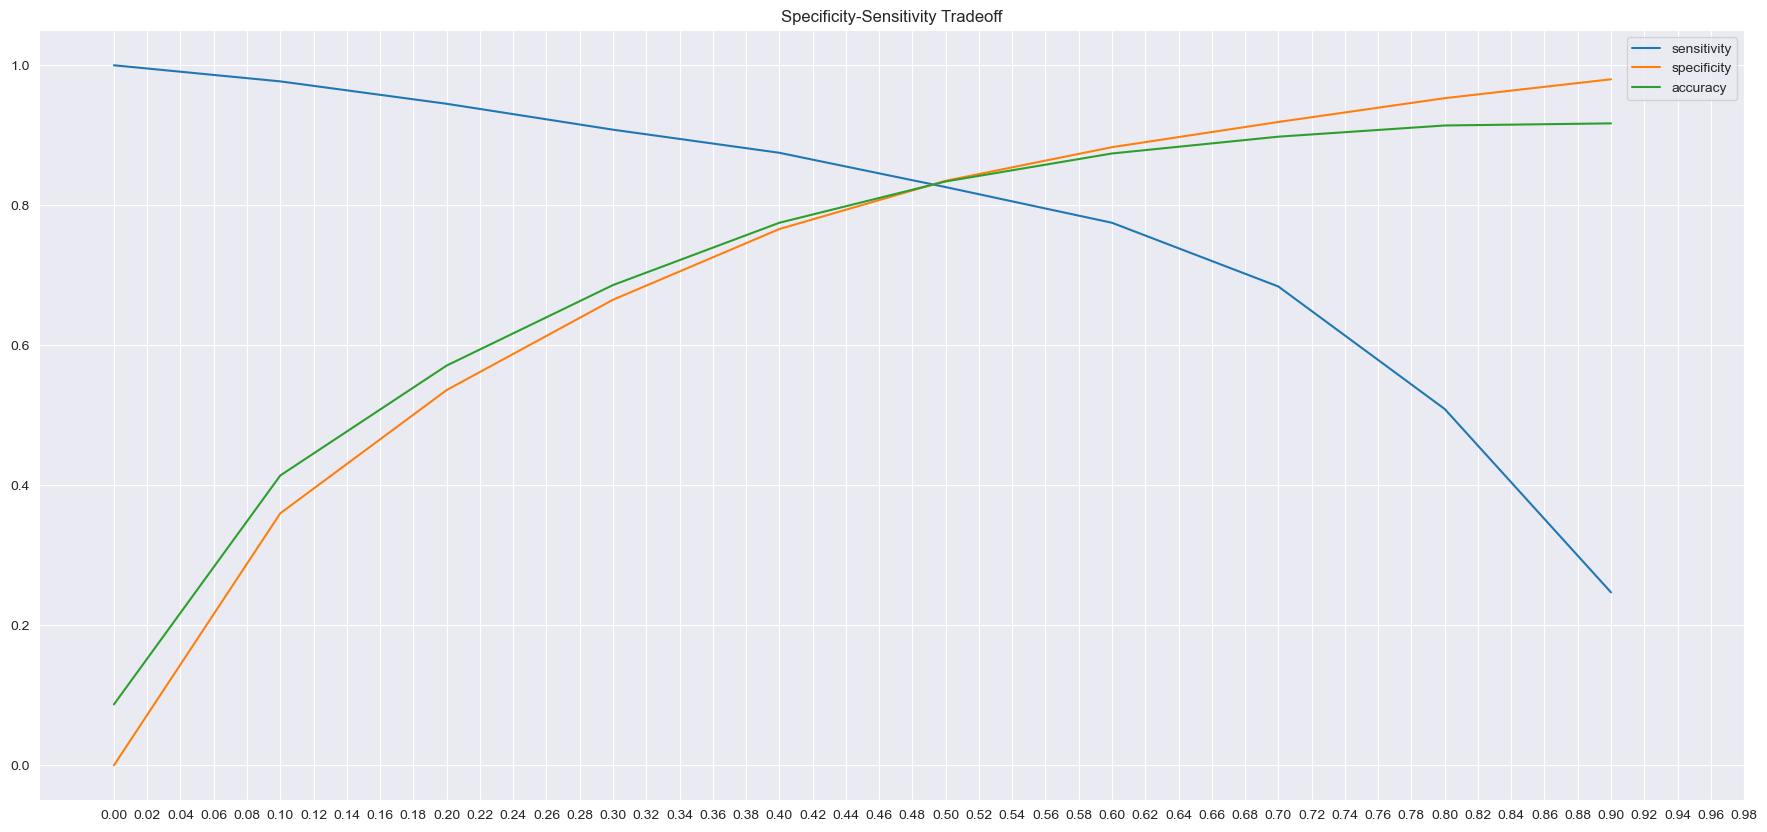

In [1411]:
metrics_df.plot(kind='line',figsize=(22,10),grid=True,xticks=np.arange(0,1,0.02),title='Specificity-Sensitivity Tradeoff');

<h3>Optimum cutoff looks at 0.49</h3>

In [1412]:
#prediction at threshold of 0.5
classification_thres=0.49;

y_train_pred_class=y_train_pred.map(lambda x:1 if x>classification_thres else 0)
y_test_pred_class=y_test_pred.map(lambda x:1 if x>classification_thres else 0)

train_matrix=confusion_matrix(y_train,y_train_pred_class)
print('Confusion Matrix for train:',train_matrix)
test_matrix=confusion_matrix(y_test,y_test_pred_class)
print("confusion Matrix for test:",test_matrix)


Confusion Matrix for train: [[15912  3275]
 [  306  1514]]
confusion Matrix for test: [[1117 7114]
 [  13  760]]


In [1413]:
print("training metrics");
metrics(train_matrix)
print("testing metrics");
metrics(test_matrix)

training metrics
accuracy 0.83
Sensitivity 0.832
Specificity 0.829
precision 0.316
F1 score 0.458
testing metrics
accuracy 0.208
Sensitivity 0.983
Specificity 0.136
precision 0.097
F1 score 0.177


In [1414]:
#ROC AUC score
print('ROC AUC score for train',roc_auc_score(y_train,y_train_pred))
print('ROC AUC score for test',roc_auc_score(y_test,y_test_pred))

ROC AUC score for train 0.8933273559192151
ROC AUC score for test 0.8465612049735304


<h2>Feature selection using RFE</h2>

In [1415]:
from sklearn.feature_selection import RFE
lr=LogisticRegression(random_state=100,class_weight='balanced')
rfe=RFE(estimator=lr,n_features_to_select=15)
results=rfe.fit(x_train,y_train)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [1416]:
#Dataframe with features supported by RFE
rfe_support=pd.DataFrame({
    'Column':x.columns.to_list(),
    'Rank':rfe.ranking_,
    'support':rfe.support_
}).sort_values(by='Rank',ascending=True)
rfe_support

,Column,Rank,support
124,sachet_2g_8_0,1,True
110,monthly_3g_6_0,1,True
81,total_rech_num_6,1,True
39,isd_og_mou_6,1,True
82,total_rech_num_7,1,True
...,...,...,...
123,sachet_3g_7_2,126,False
117,sachet_2g_6_4,127,False
119,monthly_3g_7_1,128,False
47,og_others_8,129,False


In [1417]:
#RFE selected columns
rfe_selected_cols=rfe_support.loc[rfe_support['Rank']==1,'Column'].to_list()
rfe_selected_cols

['sachet_2g_8_0',
 'monthly_3g_6_0',
 'total_rech_num_6',
 'isd_og_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'monthly_2g_7_0',
 'sachet_3g_8_0',
 'monthly_2g_8_0',
 'monthly_3g_8_0',
 'loc_ic_t2f_mou_8',
 'sep_vbc_3g',
 'sachet_2g_6_0']

<h2>Logistic Regression with RFE selected columns</h2>

In [1418]:
# Check for NaN values in the selected columns
print("Number of NaN values:", x_train_resampled[rfe_selected_cols].isnull().sum().sum())

Number of NaN values: 10359


In [1419]:
# Separate numerical and categorical columns
numerical_cols = x_train_resampled[rfe_selected_cols].select_dtypes(include=['number']).columns
categorical_cols = x_train_resampled[rfe_selected_cols].select_dtypes(include=['category', 'object']).columns

# Impute missing values for numerical columns with mean
x_train_resampled[numerical_cols] = x_train_resampled[numerical_cols].fillna(x_train_resampled[numerical_cols].mean())

# Impute missing values for categorical columns with mode
x_train_resampled[categorical_cols] = x_train_resampled[categorical_cols].fillna(x_train_resampled[categorical_cols].mode().iloc[0])


In [1420]:
import statsmodels.api as sm
lr1=sm.GLM(y_train_sampled,(sm.add_constant(x_train_resampled[rfe_selected_cols])),family=sm.families.Binomial())
lr1_fit=lr1.fit()
lr1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16731.
Date:                Tue, 05 Nov 2024   Deviance:                       33462.
Time:                        22:06:44   Pearson chi2:                 4.96e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -11.0759      0.288    -38.446      0.000     -11.641     -10.511
sachet_2g_8_0        1.5074      0.062     24.252      0.000       1.386       1.629
monthly_3g_6_0       0.2469      0.069      3.586      0.000       0.112       0.382
total_rech_num_6     0.3976      0.019     21.022      0.000       0.361       0.435
isd_og_mou_6         0.1167      0.015      7.916      0.000       0.088       0.146
total_rech_num_7     0.5448      0.024     23.172      0.000       0.499       0.591
total_rech_num_8    -1.4774      0.025    -59.400      0.000      -1.526      -1.429
std_og_t2f_mou_8    -0.2087      0.021    -10.110      0.000      -0.249      -0.168
std_ic_t2f_mou_8    -0.2207      0.024     -9.388      0.000      -0.267      -0.175
monthly_2g_7_0       1.5657      0.100     15.665      0.000       1.370       1.762
sachet_3g_8_0        1.8299      0.183      9.985      0.000       1.471       2.189
monthly_2g_8_0       3.0865      0.195     15.858      0.000       2.705       3.468
monthly_3g_8_0       2.3028      0.102     22.655      0.000       2.104       2.502
loc_ic_t2f_mou_8    -1.0464      0.037    -28.557      0.000      -1.118      -0.975
sep_vbc_3g          -0.3602      0.040     -8.904      0.000      -0.439      -0.281
sachet_2g_6_0        0.8223      0.056     14.797      0.000       0.713       0.931
====================================================================================
"""

<h2>Logistic Regression with manual feature elimination</h2>

In [1421]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(x_train_resampled,lr1_fit,cols):
    vif=pd.DataFrame()
    vif['features']=rfe_selected_cols
    vif['VIF']=[variance_inflation_factor(x_train_resampled[cols].values,i) for i in range(x_train_resampled[cols].shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.set_index('features')
    vif['p-value']=round(lr1_fit.pvalues,4)
    vif=vif.sort_values(by=['VIF','p-value'],ascending=[False,False])
    return vif
vif(x_train_resampled,lr1_fit,rfe_selected_cols)

,VIF,p-value
features,,
sachet_3g_8_0,24.99,0.0000
monthly_2g_8_0,24.82,0.0000
monthly_2g_7_0,22.85,0.0000
monthly_3g_8_0,20.54,0.0000
monthly_3g_6_0,17.52,0.0003
sachet_2g_8_0,12.09,0.0000
sachet_2g_6_0,11.34,0.0000
total_rech_num_7,2.22,0.0000
total_rech_num_8,1.83,0.0000


In [1422]:
#dropping  sachet_3g_8_0 because of high VIF
selected_cols=rfe_selected_cols
selected_cols.remove('sachet_3g_8_0')
selected_cols

['sachet_2g_8_0',
 'monthly_3g_6_0',
 'total_rech_num_6',
 'isd_og_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'monthly_2g_7_0',
 'monthly_2g_8_0',
 'monthly_3g_8_0',
 'loc_ic_t2f_mou_8',
 'sep_vbc_3g',
 'sachet_2g_6_0']

<h2>Model 2</h2>

In [1423]:

lr2=sm.GLM(y_train_sampled,(sm.add_constant(x_train_resampled[selected_cols])),family=sm.families.Binomial())
lr2_fit=lr2.fit()
lr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16805.
Date:                Tue, 05 Nov 2024   Deviance:                       33610.
Time:                        22:06:45   Pearson chi2:                 5.11e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.4662      0.230    -41.245      0.000      -9.916      -9.016
sachet_2g_8_0        1.6120      0.061     26.270      0.000       1.492       1.732
monthly_3g_6_0       0.2974      0.068      4.404      0.000       0.165       0.430
total_rech_num_6     0.3998      0.019     21.200      0.000       0.363       0.437
isd_og_mou_6         0.1189      0.015      8.064      0.000       0.090       0.148
total_rech_num_7     0.5411      0.023     23.091      0.000       0.495       0.587
total_rech_num_8    -1.4837      0.025    -59.740      0.000      -1.532      -1.435
std_og_t2f_mou_8    -0.2108      0.021    -10.181      0.000      -0.251      -0.170
std_ic_t2f_mou_8    -0.2200      0.024     -9.355      0.000      -0.266      -0.174
monthly_2g_7_0       1.5705      0.100     15.777      0.000       1.375       1.766
monthly_2g_8_0       3.0853      0.194     15.863      0.000       2.704       3.467
monthly_3g_8_0       2.3043      0.101     22.898      0.000       2.107       2.502
loc_ic_t2f_mou_8    -1.0545      0.037    -28.779      0.000      -1.126      -0.983
sep_vbc_3g          -0.3798      0.041     -9.278      0.000      -0.460      -0.300
sachet_2g_6_0        0.8713      0.055     15.864      0.000       0.764       0.979
====================================================================================
"""

In [1424]:
vif(x_train_resampled,lr2_fit,selected_cols)

,VIF,p-value
features,,
monthly_2g_8_0,23.94,0.0
monthly_2g_7_0,22.45,0.0
monthly_3g_8_0,19.48,0.0
monthly_3g_6_0,17.04,0.0
sachet_2g_6_0,10.99,0.0
sachet_2g_8_0,10.70,0.0
total_rech_num_7,2.21,0.0
total_rech_num_8,1.83,0.0
total_rech_num_6,1.52,0.0


<h5>monthly_2g_8_0 has high VIF </h5>

In [1425]:
#dropping  monthly_2g_8_0 because of high VIF
selected_cols.remove('monthly_2g_8_0')
selected_cols

['sachet_2g_8_0',
 'monthly_3g_6_0',
 'total_rech_num_6',
 'isd_og_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'monthly_2g_7_0',
 'monthly_3g_8_0',
 'loc_ic_t2f_mou_8',
 'sep_vbc_3g',
 'sachet_2g_6_0']

<h2>Model 3</h2>

In [1426]:

lr3=sm.GLM(y_train_sampled,(sm.add_constant(x_train_resampled[selected_cols])),family=sm.families.Binomial())
lr3_fit=lr3.fit()
lr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38360
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17084.
Date:                Tue, 05 Nov 2024   Deviance:                       34167.
Time:                        22:06:46   Pearson chi2:                 1.64e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.3053      0.142    -51.395      0.000      -7.584      -7.027
sachet_2g_8_0        1.5947      0.061     26.039      0.000       1.475       1.715
monthly_3g_6_0       0.3751      0.065      5.731      0.000       0.247       0.503
total_rech_num_6     0.4094      0.019     21.751      0.000       0.373       0.446
isd_og_mou_6         0.1215      0.015      8.326      0.000       0.093       0.150
total_rech_num_7     0.5612      0.023     24.010      0.000       0.515       0.607
total_rech_num_8    -1.5089      0.025    -60.709      0.000      -1.558      -1.460
std_og_t2f_mou_8    -0.2088      0.021    -10.110      0.000      -0.249      -0.168
std_ic_t2f_mou_8    -0.2292      0.023     -9.856      0.000      -0.275      -0.184
monthly_2g_7_0       2.4312      0.088     27.587      0.000       2.259       2.604
monthly_3g_8_0       2.2261      0.100     22.342      0.000       2.031       2.421
loc_ic_t2f_mou_8    -1.0857      0.037    -29.520      0.000      -1.158      -1.014
sep_vbc_3g          -0.4203      0.043     -9.830      0.000      -0.504      -0.336
sachet_2g_6_0        0.9160      0.054     16.888      0.000       0.810       1.022
====================================================================================
"""

In [1427]:
vif(x_train_resampled,lr3_fit,selected_cols)

,VIF,p-value
features,,
monthly_3g_8_0,19.43,0.0
monthly_3g_6_0,16.67,0.0
monthly_2g_7_0,11.27,0.0
sachet_2g_6_0,10.81,0.0
sachet_2g_8_0,10.62,0.0
total_rech_num_7,2.21,0.0
total_rech_num_8,1.83,0.0
total_rech_num_6,1.52,0.0
std_ic_t2f_mou_8,1.22,0.0


In [1428]:
#dropping  monthly_3g_8_0 because of high VIF
selected_cols.remove('monthly_3g_8_0')
selected_cols

['sachet_2g_8_0',
 'monthly_3g_6_0',
 'total_rech_num_6',
 'isd_og_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'monthly_2g_7_0',
 'loc_ic_t2f_mou_8',
 'sep_vbc_3g',
 'sachet_2g_6_0']

<h2>Model 4</h2>

In [1429]:

lr4=sm.GLM(y_train_sampled,(sm.add_constant(x_train_resampled[selected_cols])),family=sm.families.Binomial())
lr4_fit=lr4.fit()
lr4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38361
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17431.
Date:                Tue, 05 Nov 2024   Deviance:                       34862.
Time:                        22:06:47   Pearson chi2:                 2.17e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3799
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.9893      0.120    -49.795      0.000      -6.225      -5.754
sachet_2g_8_0        1.5609      0.061     25.486      0.000       1.441       1.681
monthly_3g_6_0       1.2200      0.052     23.627      0.000       1.119       1.321
total_rech_num_6     0.4398      0.019     23.333      0.000       0.403       0.477
isd_og_mou_6         0.1224      0.014      8.687      0.000       0.095       0.150
total_rech_num_7     0.5753      0.023     24.591      0.000       0.529       0.621
total_rech_num_8    -1.5492      0.025    -62.015      0.000      -1.598      -1.500
std_og_t2f_mou_8    -0.2121      0.021    -10.280      0.000      -0.252      -0.172
std_ic_t2f_mou_8    -0.2369      0.023    -10.184      0.000      -0.282      -0.191
monthly_2g_7_0       2.4378      0.088     27.714      0.000       2.265       2.610
loc_ic_t2f_mou_8    -1.1171      0.037    -30.258      0.000      -1.190      -1.045
sep_vbc_3g          -0.4679      0.044    -10.591      0.000      -0.555      -0.381
sachet_2g_6_0        0.9683      0.054     18.055      0.000       0.863       1.073
====================================================================================
"""

In [1430]:
vif(x_train_resampled,lr4_fit,selected_cols)

,VIF,p-value
features,,
sachet_2g_6_0,10.61,0.0
sachet_2g_8_0,10.57,0.0
monthly_2g_7_0,10.44,0.0
monthly_3g_6_0,8.83,0.0
total_rech_num_7,2.21,0.0
total_rech_num_8,1.82,0.0
total_rech_num_6,1.52,0.0
std_ic_t2f_mou_8,1.22,0.0
std_og_t2f_mou_8,1.18,0.0


In [1431]:
#dropping  sachet_2g_6_0 because of high VIF
selected_cols.remove('sachet_2g_6_0')
selected_cols

['sachet_2g_8_0',
 'monthly_3g_6_0',
 'total_rech_num_6',
 'isd_og_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'monthly_2g_7_0',
 'loc_ic_t2f_mou_8',
 'sep_vbc_3g']

<h2>Model 5</h2>

In [1432]:

lr5=sm.GLM(y_train_sampled,(sm.add_constant(x_train_resampled[selected_cols])),family=sm.families.Binomial())
lr5_fit=lr5.fit()
lr5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38362
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17597.
Date:                Tue, 05 Nov 2024   Deviance:                       35194.
Time:                        22:06:47   Pearson chi2:                 1.78e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3745
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.4999      0.115    -47.767      0.000      -5.726      -5.274
sachet_2g_8_0        1.9172      0.059     32.652      0.000       1.802       2.032
monthly_3g_6_0       1.2187      0.051     23.716      0.000       1.118       1.319
total_rech_num_6     0.4001      0.018     21.671      0.000       0.364       0.436
isd_og_mou_6         0.1167      0.014      8.347      0.000       0.089       0.144
total_rech_num_7     0.5597      0.023     24.168      0.000       0.514       0.605
total_rech_num_8    -1.5207      0.025    -61.494      0.000      -1.569      -1.472
std_og_t2f_mou_8    -0.2098      0.021    -10.214      0.000      -0.250      -0.170
std_ic_t2f_mou_8    -0.2413      0.023    -10.348      0.000      -0.287      -0.196
monthly_2g_7_0       2.4983      0.088     28.506      0.000       2.327       2.670
loc_ic_t2f_mou_8    -1.1290      0.037    -30.476      0.000      -1.202      -1.056
sep_vbc_3g          -0.4871      0.045    -10.907      0.000      -0.575      -0.400
====================================================================================
"""

In [1433]:
vif(x_train_resampled,lr5_fit,selected_cols)

,VIF,p-value
features,,
monthly_2g_7_0,9.69,0.0
monthly_3g_6_0,8.53,0.0
sachet_2g_8_0,7.45,0.0
total_rech_num_7,2.21,0.0
total_rech_num_8,1.82,0.0
total_rech_num_6,1.50,0.0
std_ic_t2f_mou_8,1.22,0.0
std_og_t2f_mou_8,1.18,0.0
loc_ic_t2f_mou_8,1.07,0.0


In [1434]:
#dropping  monthly_2g_7_0 because of high VIF
selected_cols.remove('monthly_2g_7_0')
selected_cols

['sachet_2g_8_0',
 'monthly_3g_6_0',
 'total_rech_num_6',
 'isd_og_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'loc_ic_t2f_mou_8',
 'sep_vbc_3g']

<h2>Model 6</h2>

In [1435]:

lr6=sm.GLM(y_train_sampled,(sm.add_constant(x_train_resampled[selected_cols])),family=sm.families.Binomial())
lr6_fit=lr6.fit()
lr6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38363
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18246.
Date:                Tue, 05 Nov 2024   Deviance:                       36492.
Time:                        22:06:48   Pearson chi2:                 2.21e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3529
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.1438      0.075    -42.126      0.000      -3.290      -2.998
sachet_2g_8_0        1.9316      0.058     33.221      0.000       1.818       2.046
monthly_3g_6_0       1.2104      0.051     23.962      0.000       1.111       1.309
total_rech_num_6     0.4207      0.018     23.102      0.000       0.385       0.456
isd_og_mou_6         0.1166      0.014      8.470      0.000       0.090       0.144
total_rech_num_7     0.5564      0.023     24.408      0.000       0.512       0.601
total_rech_num_8    -1.5119      0.024    -61.778      0.000      -1.560      -1.464
std_og_t2f_mou_8    -0.2125      0.021    -10.304      0.000      -0.253      -0.172
std_ic_t2f_mou_8    -0.2492      0.023    -10.747      0.000      -0.295      -0.204
loc_ic_t2f_mou_8    -1.2238      0.038    -32.540      0.000      -1.298      -1.150
sep_vbc_3g          -0.5832      0.049    -11.951      0.000      -0.679      -0.488
====================================================================================
"""

In [1436]:
vif(x_train_resampled,lr6_fit,selected_cols)

,VIF,p-value
features,,
sachet_2g_8_0,5.69,0.0
monthly_3g_6_0,5.64,0.0
total_rech_num_7,2.21,0.0
total_rech_num_8,1.81,0.0
total_rech_num_6,1.50,0.0
std_ic_t2f_mou_8,1.22,0.0
std_og_t2f_mou_8,1.18,0.0
loc_ic_t2f_mou_8,1.07,0.0
sep_vbc_3g,1.02,0.0


In [1437]:
#dropping  monthly_2g_7_0 because of high VIF
selected_cols.remove('sachet_2g_8_0')
selected_cols

['monthly_3g_6_0',
 'total_rech_num_6',
 'isd_og_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'loc_ic_t2f_mou_8',
 'sep_vbc_3g']

<h2>Model 7</h2>

In [1438]:

lr7=sm.GLM(y_train_sampled,(sm.add_constant(x_train_resampled[selected_cols])),family=sm.families.Binomial())
lr7_fit=lr7.fit()
lr7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38364
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18986.
Date:                Tue, 05 Nov 2024   Deviance:                       37971.
Time:                        22:06:48   Pearson chi2:                 2.96e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3275
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3715      0.049    -27.719      0.000      -1.468      -1.275
monthly_3g_6_0       1.1860      0.050     23.702      0.000       1.088       1.284
total_rech_num_6     0.4151      0.018     23.216      0.000       0.380       0.450
isd_og_mou_6         0.1234      0.014      9.043      0.000       0.097       0.150
total_rech_num_7     0.5660      0.022     25.311      0.000       0.522       0.610
total_rech_num_8    -1.6501      0.024    -67.927      0.000      -1.698      -1.602
std_og_t2f_mou_8    -0.2092      0.020    -10.213      0.000      -0.249      -0.169
std_ic_t2f_mou_8    -0.2567      0.023    -11.051      0.000      -0.302      -0.211
loc_ic_t2f_mou_8    -1.2467      0.038    -33.163      0.000      -1.320      -1.173
sep_vbc_3g          -0.6358      0.050    -12.608      0.000      -0.735      -0.537
====================================================================================
"""

In [1439]:
vif(x_train_resampled,lr7_fit,selected_cols)

,VIF,p-value
features,,
total_rech_num_7,2.21,0.0
total_rech_num_8,1.73,0.0
total_rech_num_6,1.50,0.0
std_ic_t2f_mou_8,1.22,0.0
std_og_t2f_mou_8,1.18,0.0
loc_ic_t2f_mou_8,1.07,0.0
sep_vbc_3g,1.02,0.0
isd_og_mou_6,1.01,0.0
monthly_3g_6_0,1.00,0.0


<h2>Final Regression model</h2>

In [1440]:
lr7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38364
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18986.
Date:                Tue, 05 Nov 2024   Deviance:                       37971.
Time:                        22:06:49   Pearson chi2:                 2.96e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3275
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3715      0.049    -27.719      0.000      -1.468      -1.275
monthly_3g_6_0       1.1860      0.050     23.702      0.000       1.088       1.284
total_rech_num_6     0.4151      0.018     23.216      0.000       0.380       0.450
isd_og_mou_6         0.1234      0.014      9.043      0.000       0.097       0.150
total_rech_num_7     0.5660      0.022     25.311      0.000       0.522       0.610
total_rech_num_8    -1.6501      0.024    -67.927      0.000      -1.698      -1.602
std_og_t2f_mou_8    -0.2092      0.020    -10.213      0.000      -0.249      -0.169
std_ic_t2f_mou_8    -0.2567      0.023    -11.051      0.000      -0.302      -0.211
loc_ic_t2f_mou_8    -1.2467      0.038    -33.163      0.000      -1.320      -1.173
sep_vbc_3g          -0.6358      0.050    -12.608      0.000      -0.735      -0.537
====================================================================================
"""

In [1441]:
selected_cols

['monthly_3g_6_0',
 'total_rech_num_6',
 'isd_og_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'loc_ic_t2f_mou_8',
 'sep_vbc_3g']

In [1442]:
#prediction
y_train_pred_lr=lr7_fit.predict(sm.add_constant(x_train_resampled[selected_cols]))
y_train_pred_lr.head()

0    0.383949
1    0.325893
2    0.268964
3    0.010492
4    0.007545
dtype: float64

In [1443]:
#prediction
y_test_pred_lr=lr7_fit.predict(sm.add_constant(x_test[selected_cols]))
y_test_pred_lr.head()

mobile_number
7002242818    0.000857
7000517161    0.919825
7002162382    0.182919
7002152271    0.276944
7002058655    0.100034
dtype: float64

<h2>Finding optimum probability cut off</h2>

In [1444]:
#Specificity/Sensitivity Tradeoff
y_train_pred_thre=pd.DataFrame(index=x_train_resampled.index)
thresholds=[float(x)/10 for x in range(10)]

def thresholder(x,thresh):
    if(x>thresh):
        return 1
    else:
        return 0
        
for i in thresholds:
    y_train_pred_thre[i]=y_train_pred_lr.map(lambda x: thresholder(x,i))
y_train_pred_thre.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1,1,1,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [1445]:
logr_metrics_df=[]

#generating a data frame for metrics of each threshold
for thres,col in zip(thresholds,y_train_pred_thre.columns.to_list()):
    confusion=confusion_matrix(y_train_sampled,y_train_pred_thre.loc[:,col])
    sensitivity,specificity,accuracy=model_metrics(confusion)

    logr_metrics_df.append({
    'sensitivity':sensitivity,
    'specificity':specificity,
    'accuracy':accuracy})

logr_metrics_df=pd.DataFrame(logr_metrics_df)
logr_metrics_df.index=thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.500
0.1,0.978,0.252,0.615
0.2,0.955,0.373,0.664
0.3,0.919,0.491,0.705
0.4,0.867,0.614,0.741
0.5,0.800,0.732,0.766
0.6,0.714,0.845,0.779
0.7,0.575,0.929,0.752
0.8,0.338,0.971,0.654
0.9,0.111,0.992,0.551


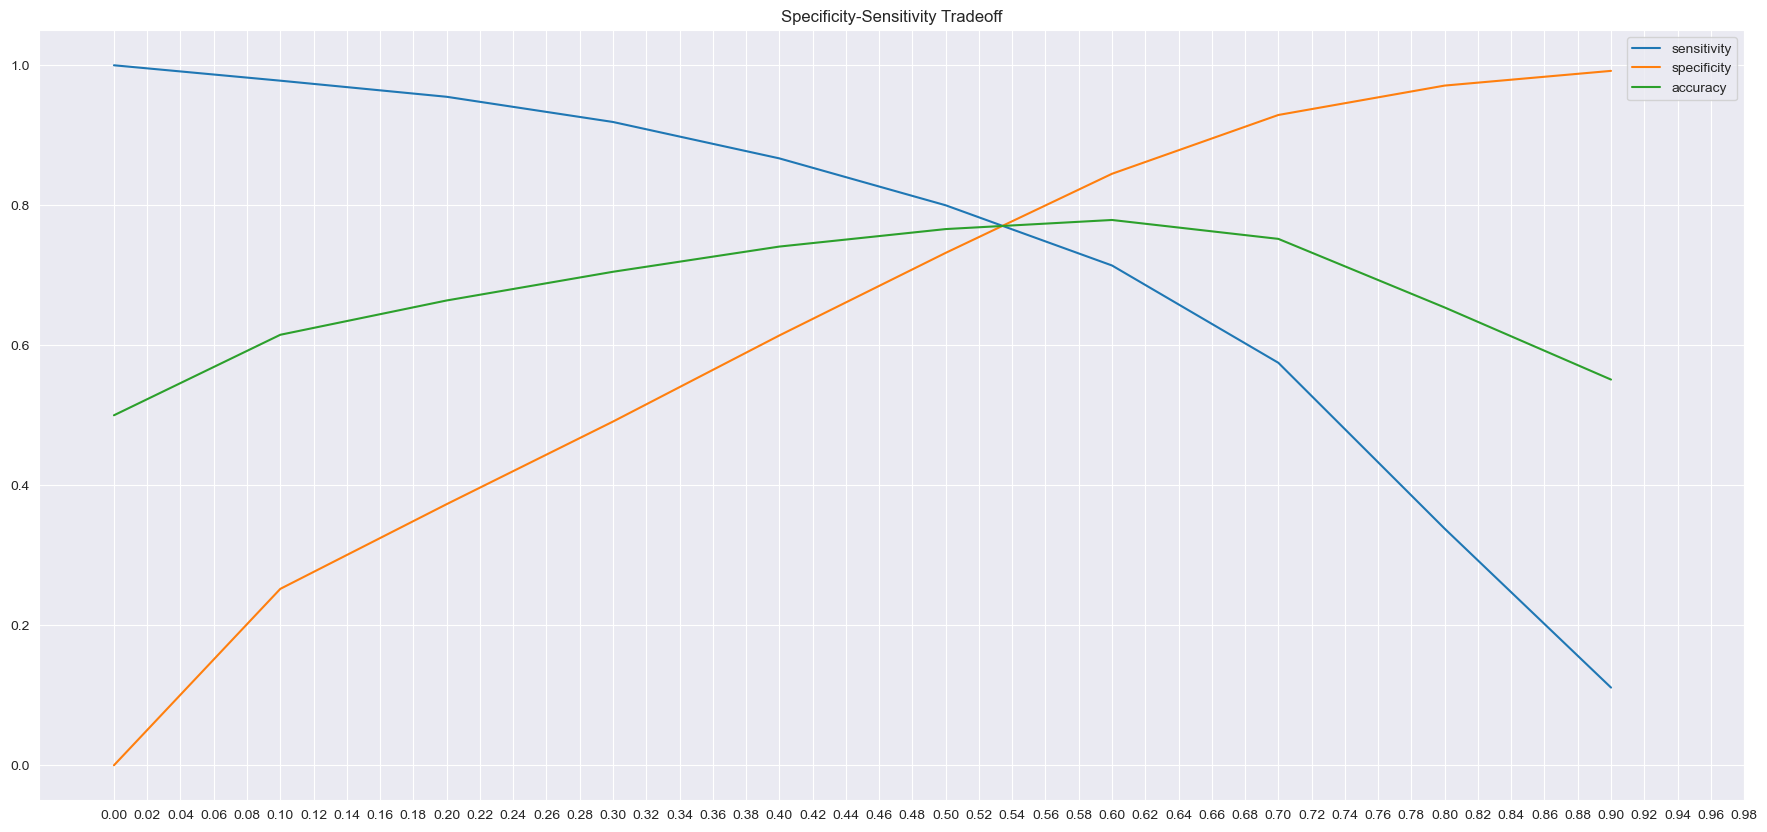

In [1446]:
logr_metrics_df.plot(kind='line',figsize=(22,10),grid=True,xticks=np.arange(0,1,0.02),title='Specificity-Sensitivity Tradeoff');

In [1447]:
#prediction at threshold of 0.53
classification_thres=0.53;

y_train_pred_lr_final=y_train_pred_lr.map(lambda x:1 if x>classification_thres else 0)
y_test_pred_lr_final=y_test_pred_lr.map(lambda x:1 if x>classification_thres else 0)

train_matrix=confusion_matrix(y_train_sampled,y_train_pred_lr_final)
print('Confusion Matrix for train:',train_matrix)
test_matrix=confusion_matrix(y_test,y_test_pred_lr_final)
print("confusion Matrix for test:",test_matrix)


Confusion Matrix for train: [[14712  4475]
 [ 4278 14909]]
confusion Matrix for test: [[6377 1854]
 [ 202  571]]


In [1448]:
print("training metrics");
metrics(train_matrix)
print("testing metrics");
metrics(test_matrix)

training metrics
accuracy 0.772
Sensitivity 0.777
Specificity 0.767
precision 0.769
F1 score 0.773
testing metrics
accuracy 0.772
Sensitivity 0.739
Specificity 0.775
precision 0.235
F1 score 0.357


In [1449]:
#ROC AUC score
print('ROC AUC score for train',roc_auc_score(y_train_sampled,y_train_pred_lr))
print('ROC AUC score for test',roc_auc_score(y_test,y_test_pred_lr))

ROC AUC score for train 0.8524281292365479
ROC AUC score for test 0.8240049646659688


<h2>PCA</h2>

In [1450]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42)
pca.fit(x_train)
pca.components_

array([[ 1.64934291e-01,  1.93792975e-01,  1.66893276e-01, ...,
        -3.09793719e-07, -5.81725657e-07, -6.37221322e-07],
       [ 6.46075970e-02,  9.50255555e-02,  1.20012189e-01, ...,
        -1.79088713e-06, -2.30706301e-06, -1.50639798e-06],
       [ 2.37689276e-01,  2.71605577e-01,  2.35380360e-01, ...,
        -5.29869176e-07, -1.78212694e-06, -3.74782521e-07],
       ...,
       [ 1.61309720e-06,  1.98068231e-06, -2.27324538e-06, ...,
        -1.51572373e-03, -7.19118247e-04, -9.48430784e-04],
       [-0.00000000e+00, -4.11890402e-17, -1.25627959e-16, ...,
         4.24109994e-17, -6.15692475e-16, -9.93356424e-17],
       [-0.00000000e+00,  1.95759170e-16,  4.87228482e-17, ...,
        -9.75142234e-16, -5.37863540e-16, -9.45113461e-17]])

In [1451]:
pca.explained_variance_ratio_

array([2.61745912e-01, 1.55458408e-01, 1.15688848e-01, 1.01546349e-01,
       8.73401400e-02, 4.82302732e-02, 4.04924208e-02, 2.52239188e-02,
       2.45490925e-02, 1.74416328e-02, 1.59221563e-02, 1.46717570e-02,
       1.11460538e-02, 9.55027706e-03, 7.39456962e-03, 5.88100223e-03,
       5.47722533e-03, 5.21780979e-03, 5.01419437e-03, 4.38731146e-03,
       4.18889922e-03, 3.50108509e-03, 3.30054568e-03, 3.13302073e-03,
       2.59847424e-03, 2.02940817e-03, 1.98428170e-03, 1.81398516e-03,
       1.35000040e-03, 1.24478107e-03, 1.10036791e-03, 1.00688359e-03,
       9.22141873e-04, 8.73252309e-04, 8.44925427e-04, 7.29433382e-04,
       6.32946680e-04, 5.44909665e-04, 4.88435210e-04, 4.82542958e-04,
       4.61474257e-04, 4.27228024e-04, 4.17159652e-04, 3.92495593e-04,
       3.36525224e-04, 2.98964573e-04, 2.40748774e-04, 2.24545138e-04,
       1.88364545e-04, 1.63893518e-04, 1.52929457e-04, 1.41850258e-04,
       1.39493407e-04, 1.03882553e-04, 9.95923931e-05, 8.52388353e-05,
      

<h2>Scree plot</h2>

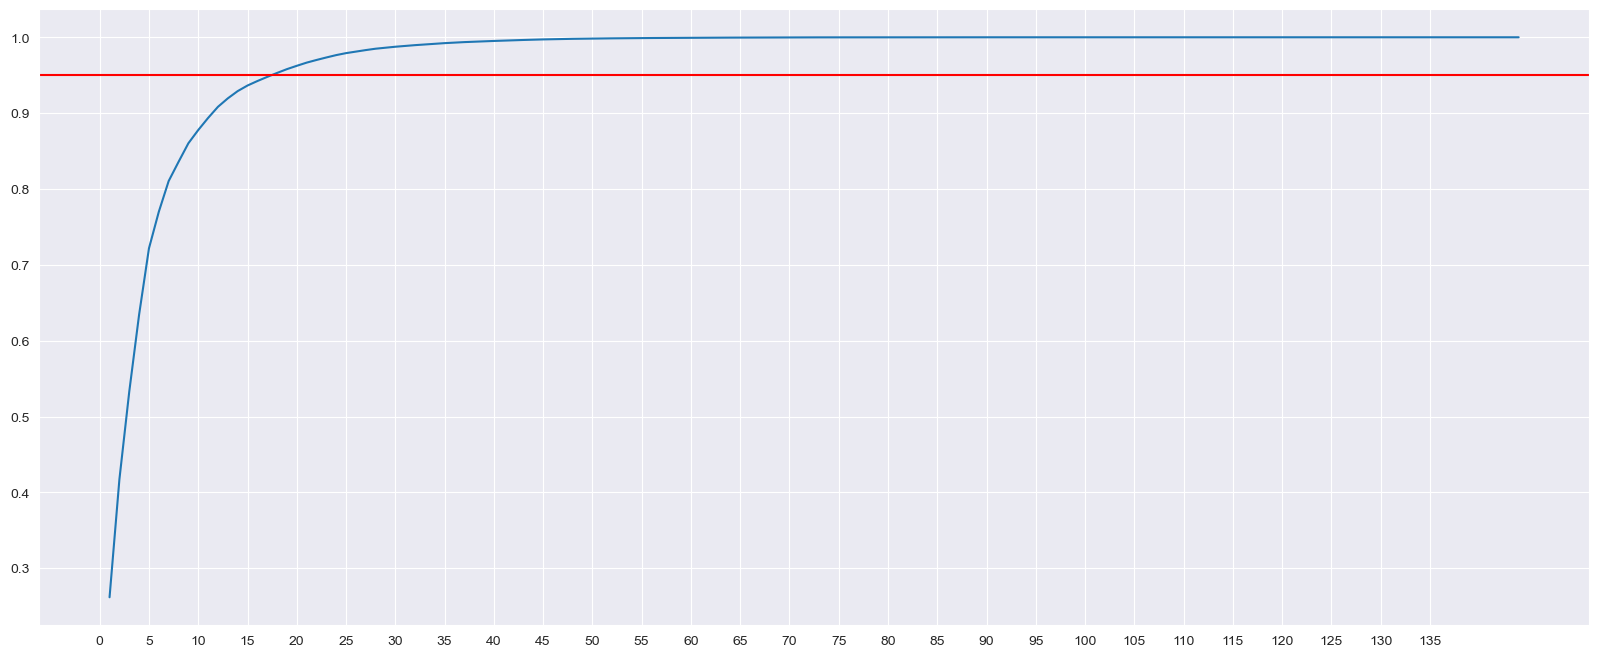

In [1452]:
plt.figure(figsize=(20, 8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1, len(var_cum) + 1), y=var_cum)
plt.xticks(np.arange(0, 140, 5))
plt.axhline(0.95, color='r')
plt.show()

<h5>from the graph it is clear that 95 percent of variance in data is explained by first 16 PCA components and 100 percent is explained by 45 PCA components</h5>

In [1453]:
#performing PCA using 45 components
pca_final=PCA(n_components=45,random_state=42)
transform_data=pca_final.fit_transform(x_train)
x_train_pca=pd.DataFrame(transform_data,columns=["PC_"+str(x) for x in range(1,46)],index=x_train.index)
df_train_pca=pd.concat([x_train_pca,y_train],axis=1)
df_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000166926,-894.489939,-335.916130,25.129304,77.031198,-113.808055,-834.023041,-682.895804,263.702769,-36.736066,369.007589,...,-1.854553,7.356916,20.845374,28.841477,-14.397928,4.923056,-8.858863,2.555306,16.808321,0
7001343085,586.519076,-900.221252,-418.241600,-316.107580,-166.786247,-188.910805,125.564523,-131.845706,272.208241,-22.730555,...,11.060651,42.729930,-1.451488,-66.021100,13.638333,24.990107,51.963609,-3.406467,8.475405,0
7001863283,-1512.274830,528.523318,863.579023,74.120030,-1138.509308,-177.495332,50.497478,-39.241377,-85.777806,-82.781019,...,-8.236192,22.406968,-0.769180,52.583262,-8.586423,8.568478,-19.433818,3.958822,25.708808,0
7002275981,502.823191,-220.424385,1132.274446,-498.205150,-2.553300,-58.295075,164.567634,-147.602733,174.481351,55.340352,...,65.369203,-58.180090,-10.401612,-5.795813,-5.076313,-6.181900,-12.989388,-14.425187,-32.545079,0
7001086221,-1439.163638,795.305705,91.198871,133.045554,163.837763,657.602441,395.702549,-17.885869,609.328875,-194.107880,...,8.883075,-33.973922,-21.157924,18.960849,-1.254879,-19.730325,-4.507856,6.671883,-11.226850,0


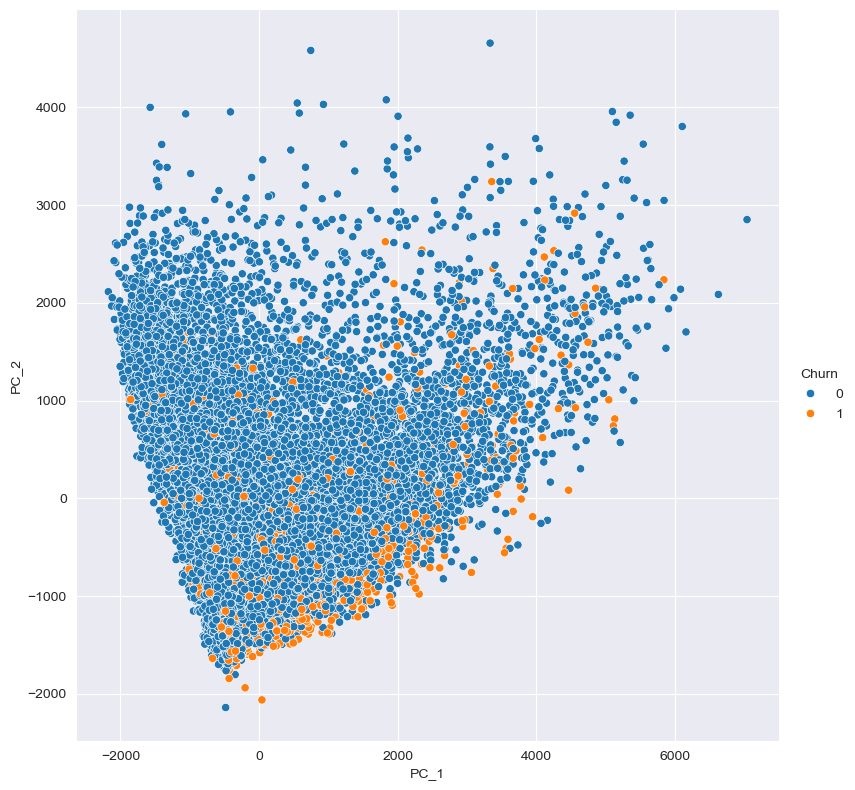

In [1454]:
#plotting pca components
sns.pairplot(data=df_train_pca,x_vars=["PC_1"],y_vars=["PC_2"],hue="Churn",size=8)

<h2>Model 2: PCA+ Logistic Regression</h2>

In [1455]:
x_train_pca=df_train_pca.drop('Churn',axis=1)
y_train_pca=df_train_pca["Churn"]

In [1456]:
#transforming test set with PCA
x_test_pca=pca_final.transform(x_test)

#logistic regression
lr_pca=LogisticRegression(random_state=100,class_weight='balanced')
lr_pca.fit(x_train_pca,y_train_pca)

LogisticRegression(class_weight='balanced', random_state=100)

In [1457]:
y_train_pred_lr_pca=lr_pca.predict(x_train_pca)
y_train_pred_lr_pca[:5]

array([1, 0, 0, 0, 0])

In [1458]:
x_test_pca=pca_final.transform(x_test)
y_test_pred_lr_pca=lr_pca.predict(x_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 1, 1, 1])

In [1459]:
train_matrix=confusion_matrix(y_train,y_train_pred_lr_pca)
test_matrix=confusion_matrix(y_test,y_test_pred_lr_pca)

In [1460]:
print("training metrics");
metrics(train_matrix)
print("testing metrics");
metrics(test_matrix)

training metrics
accuracy 0.664
Sensitivity 0.906
Specificity 0.642
precision 0.193
F1 score 0.318
testing metrics
accuracy 0.086
Sensitivity 1.0
Specificity 0.0
precision 0.086
F1 score 0.158


<h2>Hyperparameter Tuning</h2>

In [1461]:
lr_pca=LogisticRegression(random_state=100,class_weight='balanced')

In [1462]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold

params={
    'penalty':['l1','l2','none'],
    'C':[0,1,2,3,4,5,10,50]
}

folds=StratifiedKFold(n_splits=4,shuffle=True,random_state=100)
search=GridSearchCV(cv=folds,estimator=lr_pca,param_grid=params,scoring='roc_auc',verbose=True,n_jobs=1)
search.fit(x_train_pca,y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [1463]:
print('best roc score',search.best_score_)
print('best parameters',search.best_params_)

best roc score 0.8747098543228292
best parameters {'C': 10, 'penalty': 'l2'}


In [1464]:
#Modeling
lr_pca_best=search.best_estimator_
lr_pca_best_fit=lr_pca_best.fit(x_train_pca,y_train_pca)

#prediction
y_train_lr_pca_best=lr_pca_best_fit.predict(x_train_pca)
y_train_lr_pca_best[:5]

array([1, 0, 0, 0, 0])

In [1465]:
#prediction
y_test_lr_pca_best=lr_pca_best_fit.predict(x_test_pca)
y_test_lr_pca_best[:5]

array([1, 1, 1, 1, 1])

In [1466]:
train_matrix=confusion_matrix(y_train,y_train_lr_pca_best)
print('Confusion Matrix for train:',train_matrix)
test_matrix=confusion_matrix(y_test,y_test_lr_pca_best)
print("confusion Matrix for test:",test_matrix)

Confusion Matrix for train: [[12500  6687]
 [  177  1643]]
confusion Matrix for test: [[   0 8231]
 [   0  773]]


In [1467]:
print("training metrics");
metrics(train_matrix)
print("testing metrics");
metrics(test_matrix)

training metrics
accuracy 0.673
Sensitivity 0.903
Specificity 0.651
precision 0.197
F1 score 0.323
testing metrics
accuracy 0.086
Sensitivity 1.0
Specificity 0.0
precision 0.086
F1 score 0.158


<h2>Model 3: PCA + Random Forest</h2>

In [1468]:
pca_rf=RandomForestClassifier(random_state=42,class_weight={0:class_1/(class_0+class_1),1:class_0/(class_0+class_1)},oob_score=True,n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                     1: 0.9135983472726666},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [1469]:
#Hyper parameter tuning
params={
    'n_estimators':[30,40,50,100],
    'max_depth':[3,4,5,6,7],
    'min_samples_leaf':[15,20,25,30]
}
folds=StratifiedKFold(n_splits=4,shuffle=True,random_state=42)
pca_rf_model_search=GridSearchCV(estimator=pca_rf,param_grid=params,cv=folds,scoring='roc_auc',verbose=True,n_jobs=-1)
pca_rf_model_search.fit(x_train_pca,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                                            1: 0.9135983472726666},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [1470]:
#Optimum paramteres
print('Best roc score',pca_rf_model_search.best_score_)
print('Best parameters',pca_rf_model_search.best_params_)

Best roc score 0.8851353093301904
Best parameters {'max_depth': 7, 'min_samples_leaf': 30, 'n_estimators': 100}


In [1471]:
#Modeling
pca_rf_best=pca_rf_model_search.best_estimator_
pca_rf_best_fit=pca_rf_best.fit(x_train_pca,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


In [1472]:
#prediction
y_train_lr_pca_rf_best=pca_rf_best_fit.predict(x_train_pca)
y_train_lr_pca_rf_best[:5]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0])

In [1473]:
#prediction
y_test_lr_pca_rf_best=pca_rf_best_fit.predict(x_test_pca)
y_test_lr_pca_rf_best[:5]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0])

In [1474]:
train_matrix=confusion_matrix(y_train,y_train_lr_pca_rf_best)
print('Confusion Matrix for train:',train_matrix)
test_matrix=confusion_matrix(y_test,y_test_lr_pca_rf_best)
print("confusion Matrix for test:",test_matrix)

Confusion Matrix for train: [[16912  2275]
 [  333  1487]]
confusion Matrix for test: [[8231    0]
 [ 773    0]]


In [1475]:
print("training metrics");
metrics(train_matrix)

training metrics
accuracy 0.876
Sensitivity 0.817
Specificity 0.881
precision 0.395
F1 score 0.533


In [1476]:
pca_rf_best_fit.oob_score_

0.8635692864283334

<h2>Recommendations</h2>

Most important predictor of churns


<h4>monthly_3g_6_0,
 total_rech_num_6,
 isd_og_mou_6,
 total_rech_num_7,
 total_rech_num_8,
 std_og_t2f_mou_8,
 std_ic_t2f_mou_8,
 loc_ic_t2f_mou_8,
 sep_vbc_3g</h4>

Steps to reduce churn

-Lower tariffs on data usage
-Give discounts to customers
-Better customer Service
-Expansion of network 

-concentrate on customers by giving additional benefits to  who recharge less number of times in the 8th month,they are second most likely to churn(less than 1.2 std deviations compared to avg)



-concentrate on customers with 1.24 std deviations lower than average incoming calls. they are most likely to churn